In [1]:
%load_ext autoreload
%autoreload 2

In this notebook, we will explore both behavioral data (facial features)
synchronized with electrical stimulation. There are two mice, R27 and R28, that
have been implanted with a probe targeting the facial nucleus in each hemisphere.
The mice are anesthesized, then stimulated at varying current amplitudes.
Each stimulation setting is repeated several times within a single recording.
For a given recording, we might either stimulate all electrodes on the probe,
or a subset of electrodes to perform location-specific stimulation.

Below, we define some global variables to store experimental metadata.
- `CRANIOTOMY_MAP` maps from mouse name to which side the probe is implanted.
- `STIM_PROTOCOL` maps from `(date, mouse, recording number)` to
  `(stimulation amplitude, stimulation location)` where the location is a code:
  - `AS`: all electrodes
  - `1U`: first shank upper half
  - `1L`: first shank lower half
  - `2U`: second shank upper half
  - `2L`: second shank lower half
  - `3U`: third shank upper half
  - `3L`: third shank lower half
  - `4U`: fourth shank upper half
  - `4L`: fourth shank lower half

In [2]:
CRANIOTOMY_MAP = {
    "R27": "left",
    "R28": "right"
}
STIM_PROTOCOL = {
    # R27 - 20240903
    ("20240903", "R27", "000"): (1, 'AS'),
    ("20240903", "R27", "001"): (2, 'AS'),
    ("20240903", "R27", "002"): (5, 'AS'),
    ("20240903", "R27", "003"): (10, 'AS'),
    ("20240903", "R27", "004"): (0.5, 'AS'),
    ("20240903", "R27", "005"): (0.25, 'AS'),
    ("20240903", "R27", "006"): (0.1, 'AS'),
    ("20240903", "R27", "007"): (1, '1U'),
    ("20240903", "R27", "008"): (2, '1U'),
    ("20240903", "R27", "009"): (5, '1U'),
    ("20240903", "R27", "010"): (7.5, '1U'),
    ("20240903", "R27", "011"): (10, '1U'),
    ("20240903", "R27", "012"): (1, '1L'),
    ("20240903", "R27", "013"): (2, '1L'),
    ("20240903", "R27", "014"): (5, '1L'),
    ("20240903", "R27", "015"): (7.5, '1L'),
    ("20240903", "R27", "016"): (10, '1L'),
    ("20240903", "R27", "017"): (1, '2U'),
    ("20240903", "R27", "018"): (2, '2U'),
    ("20240903", "R27", "019"): (5, '2U'),
    # ("20240903", "R27", "020"): (None, None),
    ("20240903", "R27", "021"): (7.5, '2U'),
    ("20240903", "R27", "022"): (10, '2U'),
    ("20240903", "R27", "023"): (1, '2L'),
    ("20240903", "R27", "024"): (2, '2L'),
    ("20240903", "R27", "025"): (5, '5L'),
    ("20240903", "R27", "026"): (7.5, '2L'),
    ("20240903", "R27", "027"): (10, '2L'),
    ("20240903", "R27", "028"): (1, '3U'),
    ("20240903", "R27", "029"): (2, '3U'),
    ("20240903", "R27", "030"): (5, '3U'),
    ("20240903", "R27", "031"): (7.5, '3U'),
    ("20240903", "R27", "032"): (10, '3U'),
    ("20240903", "R27", "033"): (1, '3L'),
    ("20240903", "R27", "034"): (2, '3L'),
    ("20240903", "R27", "035"): (5, '3L'),
    ("20240903", "R27", "036"): (7.5, '3L'),
    ("20240903", "R27", "037"): (10, '3L'),
    ("20240903", "R27", "038"): (1, '4U'),
    ("20240903", "R27", "039"): (2, '4U'),
    ("20240903", "R27", "040"): (5, '4U'),
    # ("20240903", "R27", "041"): (None, None),
    ("20240903", "R27", "042"): (7.5, '4U'),
    ("20240903", "R27", "043"): (10, '4U'),
    ("20240903", "R27", "044"): (1, '4L'),
    ("20240903", "R27", "045"): (2, '4L'),
    ("20240903", "R27", "046"): (5, '4L'),
    ("20240903", "R27", "047"): (7.5, '4L'),
    ("20240903", "R27", "048"): (10, '4L'),
    # R28 - 20240916
    ("20240916", "R28", "000"): (1, "AS"),
    ("20240916", "R28", "001"): (2, "AS"),
    ("20240916", "R28", "002"): (5, "AS"),
    ("20240916", "R28", "003"): (10, "AS"),
    ("20240916", "R28", "004"): (0.5, "AS"),
    ("20240916", "R28", "005"): (0.25, "AS"),
    ("20240916", "R28", "006"): (0.1, "AS"),
    ("20240916", "R28", "007"): (1, "1U"),
    ("20240916", "R28", "008"): (2, "1U"),
    ("20240916", "R28", "009"): (5, "1U"),
    ("20240916", "R28", "010"): (7.5, "1U"),
    ("20240916", "R28", "011"): (10, "1U"),
    ("20240916", "R28", "012"): (1, "1L"),
    ("20240916", "R28", "013"): (2, "1L"),
    ("20240916", "R28", "014"): (5, "1L"),
    ("20240916", "R28", "015"): (7.5, "1L"),
    ("20240916", "R28", "016"): (10, "1L"),
    ("20240916", "R28", "017"): (1, "2U"),
    ("20240916", "R28", "018"): (2, "2U"),
    # ("20240916", "R28", "019"): (5, "2U"),
    ("20240916", "R28", "020"): (5, "2U"),
    ("20240916", "R28", "021"): (7.5, "2U"),
    ("20240916", "R28", "022"): (10, "2U"),
    ("20240916", "R28", "023"): (1, "2L"),
    ("20240916", "R28", "024"): (2, "2L"),
    # ("20240916", "R28", "025"): (5, "2L"),
    ("20240916", "R28", "026"): (5, "2L"),
    ("20240916", "R28", "027"): (7.5, "2L"),
    ("20240916", "R28", "028"): (10, "2L"),
    ("20240916", "R28", "029"): (1, "3U"),
    ("20240916", "R28", "030"): (2, "3U"),
    ("20240916", "R28", "031"): (5, "3U"),
    ("20240916", "R28", "032"): (7.5, "3U"),
    ("20240916", "R28", "033"): (10, "3U"),
    ("20240916", "R28", "034"): (1, "3L"),
    ("20240916", "R28", "035"): (2, "3L"),
    ("20240916", "R28", "036"): (5, "3L"),
    ("20240916", "R28", "037"): (7.5, "3L"),
    ("20240916", "R28", "038"): (10, "3L"),
    ("20240916", "R28", "039"): (1, "4U"),
    ("20240916", "R28", "040"): (2, "4U"),
    ("20240916", "R28", "041"): (5, "4U"),
    ("20240916", "R28", "042"): (7.5, "4U"),
    ("20240916", "R28", "043"): (10, "4U"),
    ("20240916", "R28", "044"): (1, "4L"),
    ("20240916", "R28", "045"): (2, "4L"),
    ("20240916", "R28", "046"): (5, "4L"),
    ("20240916", "R28", "047"): (7.5, "4L"),
    ("20240916", "R28", "048"): (10, "4L")
}

Next, we import some packages and utility functions.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
from tqdm.auto import tqdm

from projectlib.utils import read_3d_data, sns_setup, VideoFrames
from projectlib.anatomy import compute_measurements_df

sns_setup(font="sans-serif")

Now, we read in the behavioral data.
This is stored in `anipose-data/202408-ephys-all`, with a separate sub-folder
for each recording. We build a dictionary that maps from `(date, mouse, recording)`
to the CSV data file.

In [4]:
ANIPOSE_BASE = "anipose-data/202408-ephys-all"
COORDINATE_PATHS = {}
key_cols = ("date", "mouse", "run")
for p in Path(ANIPOSE_BASE).glob('*/pose-3d/*.csv'):
    date, mouse, *_, run, _ = p.name.split("_")
    if (date, mouse, run) not in STIM_PROTOCOL.keys():
        continue
    COORDINATE_PATHS[(date, mouse, run)] = p
data_keys = list(COORDINATE_PATHS.keys())
data_keys

[('20240916', 'R28', '033'),
 ('20240916', 'R28', '041'),
 ('20240916', 'R28', '023'),
 ('20240916', 'R28', '022'),
 ('20240903', 'R27', '000'),
 ('20240916', 'R28', '015'),
 ('20240903', 'R27', '014'),
 ('20240903', 'R27', '023'),
 ('20240916', 'R28', '013'),
 ('20240916', 'R28', '001'),
 ('20240916', 'R28', '047'),
 ('20240916', 'R28', '030'),
 ('20240903', 'R27', '038'),
 ('20240903', 'R27', '001'),
 ('20240916', 'R28', '014'),
 ('20240916', 'R28', '037'),
 ('20240916', 'R28', '042'),
 ('20240916', 'R28', '026'),
 ('20240916', 'R28', '003'),
 ('20240903', 'R27', '025'),
 ('20240903', 'R27', '040'),
 ('20240916', 'R28', '044'),
 ('20240903', 'R27', '013'),
 ('20240916', 'R28', '036'),
 ('20240903', 'R27', '027'),
 ('20240903', 'R27', '004'),
 ('20240903', 'R27', '026'),
 ('20240916', 'R28', '029'),
 ('20240903', 'R27', '019'),
 ('20240903', 'R27', '032'),
 ('20240903', 'R27', '046'),
 ('20240903', 'R27', '002'),
 ('20240916', 'R28', '008'),
 ('20240903', 'R27', '033'),
 ('20240916', 

Finally, we read in the behavioral data and compute various geometrical features
from the raw keypoint data.

In [5]:
coord_data = {k: read_3d_data(v.parent.parent.as_posix())
              for k, v in COORDINATE_PATHS.items()}

meas_df = compute_measurements_df(coord_data, key_columns=key_cols)
meas_df

,date,mouse,run,measurement_group,measurement_name,measurement_units,measurement_type,measurement_value,std,count,timeseries
534,20240903,R27,002,ear,ear-height-right,mm,distance,113.490006,0.007359,1401,"[113.4975679057154, 113.49756527300505, 113.49..."
1302,20240903,R27,009,ear,ear-angle-left,deg,angle,18.654235,0.082553,5304,"[18.56240466865299, 18.553821852786548, 18.554..."
1301,20240903,R27,009,ear,ear-width-right,mm,distance,188.587363,0.020070,5304,"[188.58298963192473, 188.57998735156553, 188.5..."
1300,20240903,R27,009,ear,ear-width-left,mm,distance,5.241169,0.014813,5304,"[5.237976533324697, 5.24632365137688, 5.238665..."
1299,20240903,R27,009,ear,ear-height-right,mm,distance,113.457864,0.006769,5304,"[113.44928178500231, 113.44862777213228, 113.4..."
...,...,...,...,...,...,...,...,...,...,...,...
714,20240916,R28,040,eye,eye-height-left,mm,distance,2.459496,0.007124,3061,"[2.441709634073867, 2.441770220724938, 2.44174..."
715,20240916,R28,040,eye,eye-height-right,mm,distance,2.570086,0.006873,3061,"[2.56846233828404, 2.568894520088871, 2.568913..."
716,20240916,R28,040,eye,eye-width-left,mm,distance,3.907678,0.010112,3061,"[3.879720480803889, 3.8796879785101184, 3.8796..."
718,20240916,R28,040,eye,eye-area-left,mm^2,area,7.577155,0.031056,3061,"[7.469545528662664, 7.469677586080365, 7.46959..."


To synchronize the behavioral data with our stimulations, we need a signal that
indicates when a stimulation was performed.
Fortunately, the videos contain an LED that turns on whenever stimulation is on.
In the code below, we
1. Define `BBOX` which is a bounding box in pixels around the LED
2. Read in the video file using the `VideoFrames` class
3. Iterate over the frames and measure the average brightness in bounding box
4. Threshold the brightness signal whenever it reachs 90% of its peak brightness
5. Plot the resulting binary signal to verify that we can extract stimulation times

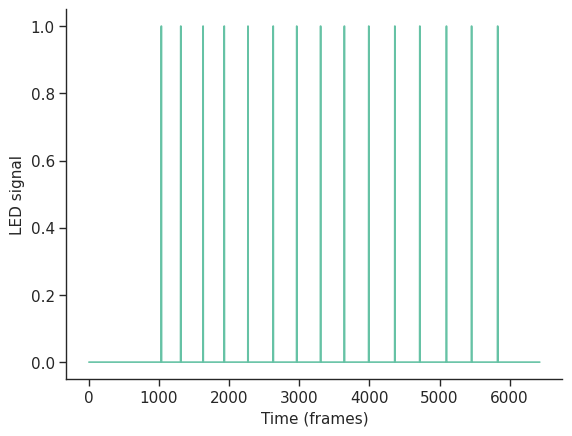

In [6]:
BBOX = (420, 430, 10, 20)

def load_video_stim(path, bbox):
    # get VideoFrames object
    video = VideoFrames(path, bounds=bbox)
    # get average brightness level
    brightness = []
    for frame in video:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        brightness.append(np.mean(frame))
    # normalize brightness level
    brightness = np.asarray(brightness)
    peak_brightness = np.max(brightness)
    # threshold brightness
    led_threshold = 0.9 * peak_brightness
    led_signal = np.where(brightness > led_threshold, 1, 0)

    return led_signal

led = load_video_stim("fe-data/20240903_R27_recording_rig1/20240903_R27_recording_anes_000_BC_15-32-47.avi",
                      BBOX)
plt.plot(led)
plt.xlabel("Time (frames)")
plt.ylabel("LED signal")
sns.despine()

Now, we use the utility defined above to build up a `DataFrame` with the
stimulation location, amplitude, and times for each recording.

In [ ]:
def build_ephys_df_led(data_keys, craniotomy, run_map, bbox):
    df = []
    # loop over all recordings
    for date, mouse, run in tqdm(data_keys):
        # get the implantation side for this mouse
        craniotomy_side = craniotomy[mouse]
        # get the stimulation parameters for this recording
        stim_amp, stim_loc = run_map[(date, mouse, run)]
        # break apart the stimulation location code into
        # stimulation shank (1, 2, 3, 4) and stimulation depth (U, L)
        if stim_loc == "AS":
            stim_shank = "A"
            stim_depth = "A"
        else:
            stim_shank, stim_depth = stim_loc
        # use our utility to read in the LED signal
        # take the path to the CSV file and find the corresponding video file
        # (see the anipose-data folder to understand why this works)
        csv_path = COORDINATE_PATHS[(date, mouse, run)]
        fname_parts = csv_path.name.split("_")
        stim_vid = "_".join(fname_parts[:-1]) + "_BC_" + fname_parts[-1]
        stim_vid = stim_vid.replace(".csv", ".avi")
        stim_vid = csv_path.parent.parent.joinpath(f"videos-raw/{stim_vid}")
        stim_signal = load_video_stim(str(stim_vid), bbox)
        # find the stimulation times based on the rising edge of the LED signal
        # convert stimulation times from frames to seconds by dividing the FPS = 100
        stim_times = np.where((stim_signal[1:] - stim_signal[:-1]) > 0)[0] / 100.0
        # add this recording to the list of rows in the dataframe
        df.append([date, mouse, run,
                   stim_amp, len(stim_times),
                   stim_shank, stim_depth, craniotomy_side,
                   stim_signal, stim_times,
                   0.0, 100.0, 0.0])

    # create a dataframe object from the rows
    df = pd.DataFrame(df, columns=[*key_cols,
                                   "stim_amplitude", "nrepeats",
                                   "stim_shank", "stim_depth", "stim_side",
                                   "stim_signal", "stim_times",
                                   "lag_time", "sample_rate", "lag_slope"])

    return df

ephys_df = build_ephys_df_led(data_keys, CRANIOTOMY_MAP, STIM_PROTOCOL, BBOX)
ephys_df

  0%|          | 0/94 [00:00<?, ?it/s]

,date,mouse,run,stim_amplitude,nrepeats,stim_shank,stim_depth,stim_side,stim_signal,stim_times,lag_time,sample_rate,lag_slope
0,20240916,R28,033,10.0,10,3,U,right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7.02, 9.43, 11.93, 14.63, 17.2, 19.85, 22.54,...",0.0,100.0,0.0
1,20240916,R28,041,5.0,10,4,U,right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4.24, 6.52, 8.9, 11.4, 14.06, 16.6, 19.15, 21...",0.0,100.0,0.0
2,20240916,R28,023,1.0,10,2,L,right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5.29, 7.58, 10.31, 12.9, 15.66, 18.37, 21.18,...",0.0,100.0,0.0
3,20240916,R28,022,10.0,10,2,U,right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5.44, 7.77, 10.06, 12.47, 14.84, 17.3, 19.81,...",0.0,100.0,0.0
4,20240903,R27,000,1.0,15,A,A,left,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[10.3, 13.07, 16.25, 19.27, 22.66, 26.25, 29.6...",0.0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,20240903,R27,048,10.0,15,4,L,left,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.59, 8.79, 11.14, 13.41, 15.95, 18.44, 20.93...",0.0,100.0,0.0
90,20240916,R28,016,10.0,10,1,L,right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4.76, 7.28, 10.12, 12.94, 15.9, 18.86, 21.91,...",0.0,100.0,0.0
91,20240916,R28,027,7.5,10,2,L,right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4.44, 6.93, 9.54, 12.15, 14.64, 17.28, 19.63,...",0.0,100.0,0.0
92,20240916,R28,006,0.1,10,A,A,right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5.91, 8.5, 11.24, 14.22, 16.6, 19.27, 22.23, ...",0.0,100.0,0.0


To make our lives easier, we will combine the behavioral and stimulation `DataFrames`s.
There are many rows in the behavioral data corresponding to a single row in the
stimulation data, because for each recording we have multiple facial features that we measure.
So, we use a utility to select the matching stimulation data row for each row
of the behavioral data, then concatenate the columns together.

In [8]:
def _select_ephys_row(row):
    ephys_row = ephys_df.query("date == @row.date & "
                               "mouse == @row.mouse & "
                               "run == @row.run")

    return ephys_row[["stim_amplitude",
                      "nrepeats",
                      "stim_shank",
                      "stim_depth",
                      "stim_side",
                      "stim_times"]].squeeze()

merge_df = pd.concat([meas_df, meas_df.apply(_select_ephys_row, axis=1)], axis=1)
merge_df

,date,mouse,run,measurement_group,measurement_name,measurement_units,measurement_type,measurement_value,std,count,timeseries,stim_amplitude,nrepeats,stim_shank,stim_depth,stim_side,stim_times
534,20240903,R27,002,ear,ear-height-right,mm,distance,113.490006,0.007359,1401,"[113.4975679057154, 113.49756527300505, 113.49...",5.0,3,A,A,left,"[7.09, 9.48, 12.14]"
1302,20240903,R27,009,ear,ear-angle-left,deg,angle,18.654235,0.082553,5304,"[18.56240466865299, 18.553821852786548, 18.554...",5.0,15,1,U,left,"[4.86, 7.67, 10.43, 13.43, 16.33, 19.17, 22.02..."
1301,20240903,R27,009,ear,ear-width-right,mm,distance,188.587363,0.020070,5304,"[188.58298963192473, 188.57998735156553, 188.5...",5.0,15,1,U,left,"[4.86, 7.67, 10.43, 13.43, 16.33, 19.17, 22.02..."
1300,20240903,R27,009,ear,ear-width-left,mm,distance,5.241169,0.014813,5304,"[5.237976533324697, 5.24632365137688, 5.238665...",5.0,15,1,U,left,"[4.86, 7.67, 10.43, 13.43, 16.33, 19.17, 22.02..."
1299,20240903,R27,009,ear,ear-height-right,mm,distance,113.457864,0.006769,5304,"[113.44928178500231, 113.44862777213228, 113.4...",5.0,15,1,U,left,"[4.86, 7.67, 10.43, 13.43, 16.33, 19.17, 22.02..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,20240916,R28,040,eye,eye-height-left,mm,distance,2.459496,0.007124,3061,"[2.441709634073867, 2.441770220724938, 2.44174...",2.0,10,4,U,right,"[3.92, 6.0, 8.21, 10.45, 12.74, 15.1, 17.53, 1..."
715,20240916,R28,040,eye,eye-height-right,mm,distance,2.570086,0.006873,3061,"[2.56846233828404, 2.568894520088871, 2.568913...",2.0,10,4,U,right,"[3.92, 6.0, 8.21, 10.45, 12.74, 15.1, 17.53, 1..."
716,20240916,R28,040,eye,eye-width-left,mm,distance,3.907678,0.010112,3061,"[3.879720480803889, 3.8796879785101184, 3.8796...",2.0,10,4,U,right,"[3.92, 6.0, 8.21, 10.45, 12.74, 15.1, 17.53, 1..."
718,20240916,R28,040,eye,eye-area-left,mm^2,area,7.577155,0.031056,3061,"[7.469545528662664, 7.469677586080365, 7.46959...",2.0,10,4,U,right,"[3.92, 6.0, 8.21, 10.45, 12.74, 15.1, 17.53, 1..."


Let's visualize the data. We will query our `DataFrame` for a specific date,
mouse, and facial measurement. We will also focus on only all electrode stimulation
so that everything is fairly comparable.
Next, we will use `seaborn.FacetGrid` to generate a grid of plots, one for each
stimulation amplitude, and plot the facial measurement signal aligned to each stimulation.

We've written the code in `plot_helper` to plot all the raw traces.
**_You should fill in the TODO section with additional plotting to show the mean
signal across all stimulations._**

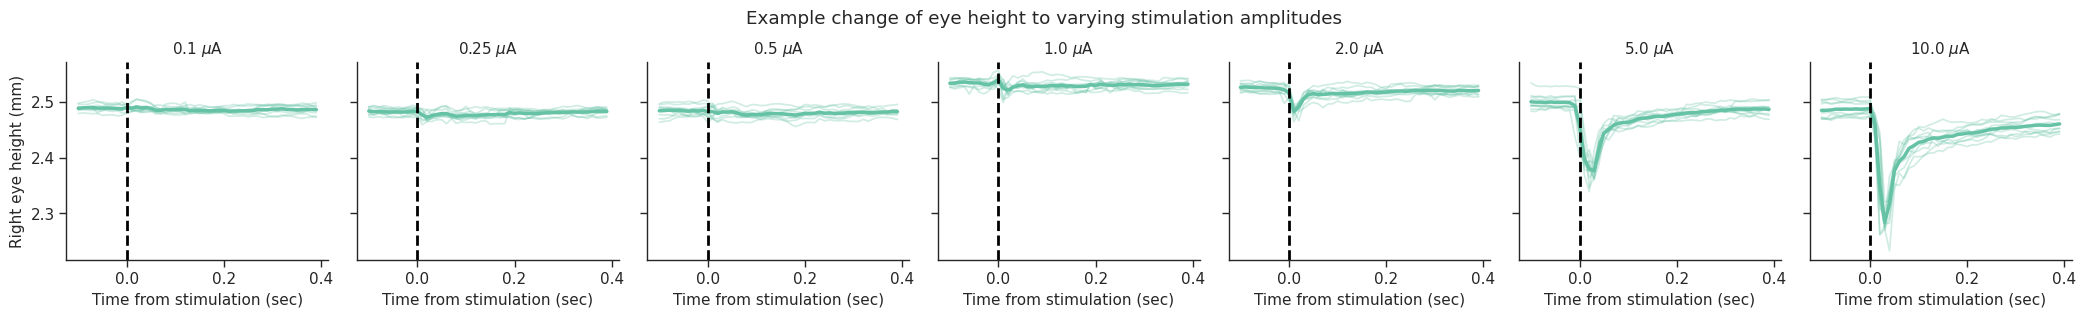

In [10]:
# utility to convert an array of times in seconds to frames
def _time_to_frame(ts):
    return np.floor(ts * 100).astype(int)

# this function is a plotting utility that we pass to FacetGrid.map
# it is responsible for plotting what goes in each subplot of the grid
# it receives Pandas Series as arguments corresponding to the columns of our DataFrame
def plot_helper(stim_times, timeseries, color):
    # there should be only a single row in our Series objects
    # which is why you see XXXX.values[0]
    # convert stimulation times to frames
    stim_times = _time_to_frame(stim_times.values[0])
    # get the facial feature timeseries
    timeseries = timeseries.values[0]
    # define the window around each stimulation
    t_prestim = int(0.1 * 100) # 0.1 seconds before stim
    t_poststim = int(0.4 * 100) # 0.4 seconds after stim
    # for each stimulation time, read in the signal in a window around
    # that time point
    # this builds up a list of timeseries where each item in the list
    # corresponds to a single stimulation
    ys = [timeseries[(t - t_prestim):(t + t_poststim)] for t in stim_times]
    # define the time axis for each timeseries in the list where
    # t = 0 is the time of stimulation
    xs = [(np.arange(len(y)) - t_prestim) / 100 for y in ys]
    # for each stimulation in the list, plot the behavioral signal
    for x, y in zip(xs, ys):
        sns.lineplot(x=x, y=y, color=color, alpha=0.3, linewidth=1.25)
    # TODO: add code to plot the mean behavioral signal across all
    # stimulations in the list
    sns.lineplot(x=np.concatenate(xs), y=np.concatenate(ys),
                 color=color, errorbar=None, linewidth=2.5)
    # plot the time of stimulation as a vertical dashed line
    plt.axvline(0, color="black", linestyle="dashed", linewidth=2)

# query the data for a specific date, mouse, stimulation location, and measurement
sub_df = merge_df.query("date == '20240916' & mouse == 'R28' & "
                        "stim_shank == 'A' & stim_depth == 'A' & "
                        "measurement_name == 'eye-height-right'")
# create a grid of plots where the columns of the grid correspond
# to different values of the stimulation amplitude column in the data
g = sns.FacetGrid(sub_df,
                  col="stim_amplitude",
                  col_order=sub_df["stim_amplitude"].unique().sort(),
                  sharey=True,
                  aspect=1,
                  margin_titles=True)
# plot the data in the grid using our helper utility
g.map(plot_helper, "stim_times", "timeseries")
g.figure.suptitle("Example change of eye height to varying stimulation amplitudes", y=1.05)
g.set_titles(col_template="{col_name} $\mu$A")
g.set_xlabels("Time from stimulation (sec)")
g.set_ylabels("Right eye height (mm)")
sns.despine(g.figure)

Great! We see that as the stimulation amplitude increases, the right eye height
quickly decreases than increases (i.e. the mouse blinks).
Let's quantify this transient motion after stimulation.
Below, we define a utility that takes in a row of data, then computes
the relative height of the peak we see in the plots above.
We apply this utility to each row of our data then create a new `DataFrame` with
the computed values as a new column.

In [11]:
def compute_peak_amp(row):
    # get the signal
    signal = row["timeseries"]
    # get the stimulation times
    stim = _time_to_frame(row["stim_times"])
    tpre = int(0.1 * 100)
    tpost = int(0.4 * 100)
    # measure the average signal 0.1 seconds prior to each stimulation
    baseline = np.array([np.mean(signal[(t - tpre):t]) for t in stim])
    # find the peak (positive or negative) relative the baseline for each stimulation
    peak = np.array([max(np.max(signal[t:(t + tpost)] - b),
                         np.min(signal[t:(t + tpost)] - b),
                         key=abs)
                     for t, b in zip(stim, baseline)])

    # return the computed peaks as a Series (i.e. column)
    return pd.Series({"peak_amplitude": peak})

peak_amplitude = merge_df.apply(compute_peak_amp, axis=1)

motion_df = pd.concat([merge_df, peak_amplitude], axis=1)
motion_df

,date,mouse,run,measurement_group,measurement_name,measurement_units,measurement_type,measurement_value,std,count,timeseries,stim_amplitude,nrepeats,stim_shank,stim_depth,stim_side,stim_times,peak_amplitude
534,20240903,R27,002,ear,ear-height-right,mm,distance,113.490006,0.007359,1401,"[113.4975679057154, 113.49756527300505, 113.49...",5.0,3,A,A,left,"[7.09, 9.48, 12.14]","[0.013602855400222325, -0.010255631320731595, ..."
1302,20240903,R27,009,ear,ear-angle-left,deg,angle,18.654235,0.082553,5304,"[18.56240466865299, 18.553821852786548, 18.554...",5.0,15,1,U,left,"[4.86, 7.67, 10.43, 13.43, 16.33, 19.17, 22.02...","[0.1611718632410266, -0.1290366533176197, 0.11..."
1301,20240903,R27,009,ear,ear-width-right,mm,distance,188.587363,0.020070,5304,"[188.58298963192473, 188.57998735156553, 188.5...",5.0,15,1,U,left,"[4.86, 7.67, 10.43, 13.43, 16.33, 19.17, 22.02...","[0.05331821616445609, -0.03891921680639143, -0..."
1300,20240903,R27,009,ear,ear-width-left,mm,distance,5.241169,0.014813,5304,"[5.237976533324697, 5.24632365137688, 5.238665...",5.0,15,1,U,left,"[4.86, 7.67, 10.43, 13.43, 16.33, 19.17, 22.02...","[-0.038985566152025086, -0.044516224025508144,..."
1299,20240903,R27,009,ear,ear-height-right,mm,distance,113.457864,0.006769,5304,"[113.44928178500231, 113.44862777213228, 113.4...",5.0,15,1,U,left,"[4.86, 7.67, 10.43, 13.43, 16.33, 19.17, 22.02...","[0.015614486304741604, -0.0075945479450041375,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,20240916,R28,040,eye,eye-height-left,mm,distance,2.459496,0.007124,3061,"[2.441709634073867, 2.441770220724938, 2.44174...",2.0,10,4,U,right,"[3.92, 6.0, 8.21, 10.45, 12.74, 15.1, 17.53, 1...","[-0.01110899004072774, -0.009157434278257881, ..."
715,20240916,R28,040,eye,eye-height-right,mm,distance,2.570086,0.006873,3061,"[2.56846233828404, 2.568894520088871, 2.568913...",2.0,10,4,U,right,"[3.92, 6.0, 8.21, 10.45, 12.74, 15.1, 17.53, 1...","[0.011692589374353357, -0.014038019684817549, ..."
716,20240916,R28,040,eye,eye-width-left,mm,distance,3.907678,0.010112,3061,"[3.879720480803889, 3.8796879785101184, 3.8796...",2.0,10,4,U,right,"[3.92, 6.0, 8.21, 10.45, 12.74, 15.1, 17.53, 1...","[0.010165637905317215, -0.006752369538437719, ..."
718,20240916,R28,040,eye,eye-area-left,mm^2,area,7.577155,0.031056,3061,"[7.469545528662664, 7.469677586080365, 7.46959...",2.0,10,4,U,right,"[3.92, 6.0, 8.21, 10.45, 12.74, 15.1, 17.53, 1...","[-0.03468370401784249, -0.04170505122459289, -..."


Now, we have a single number (the peak amplitude) for each stimulation that
summarize how much the facial feature changed post-stimulation.
Let's use it to see how stimulation amplitude affects the change in facial features.
In particular, let's compare the eye height change on the ipsilateral and
contralateral sides of the face.

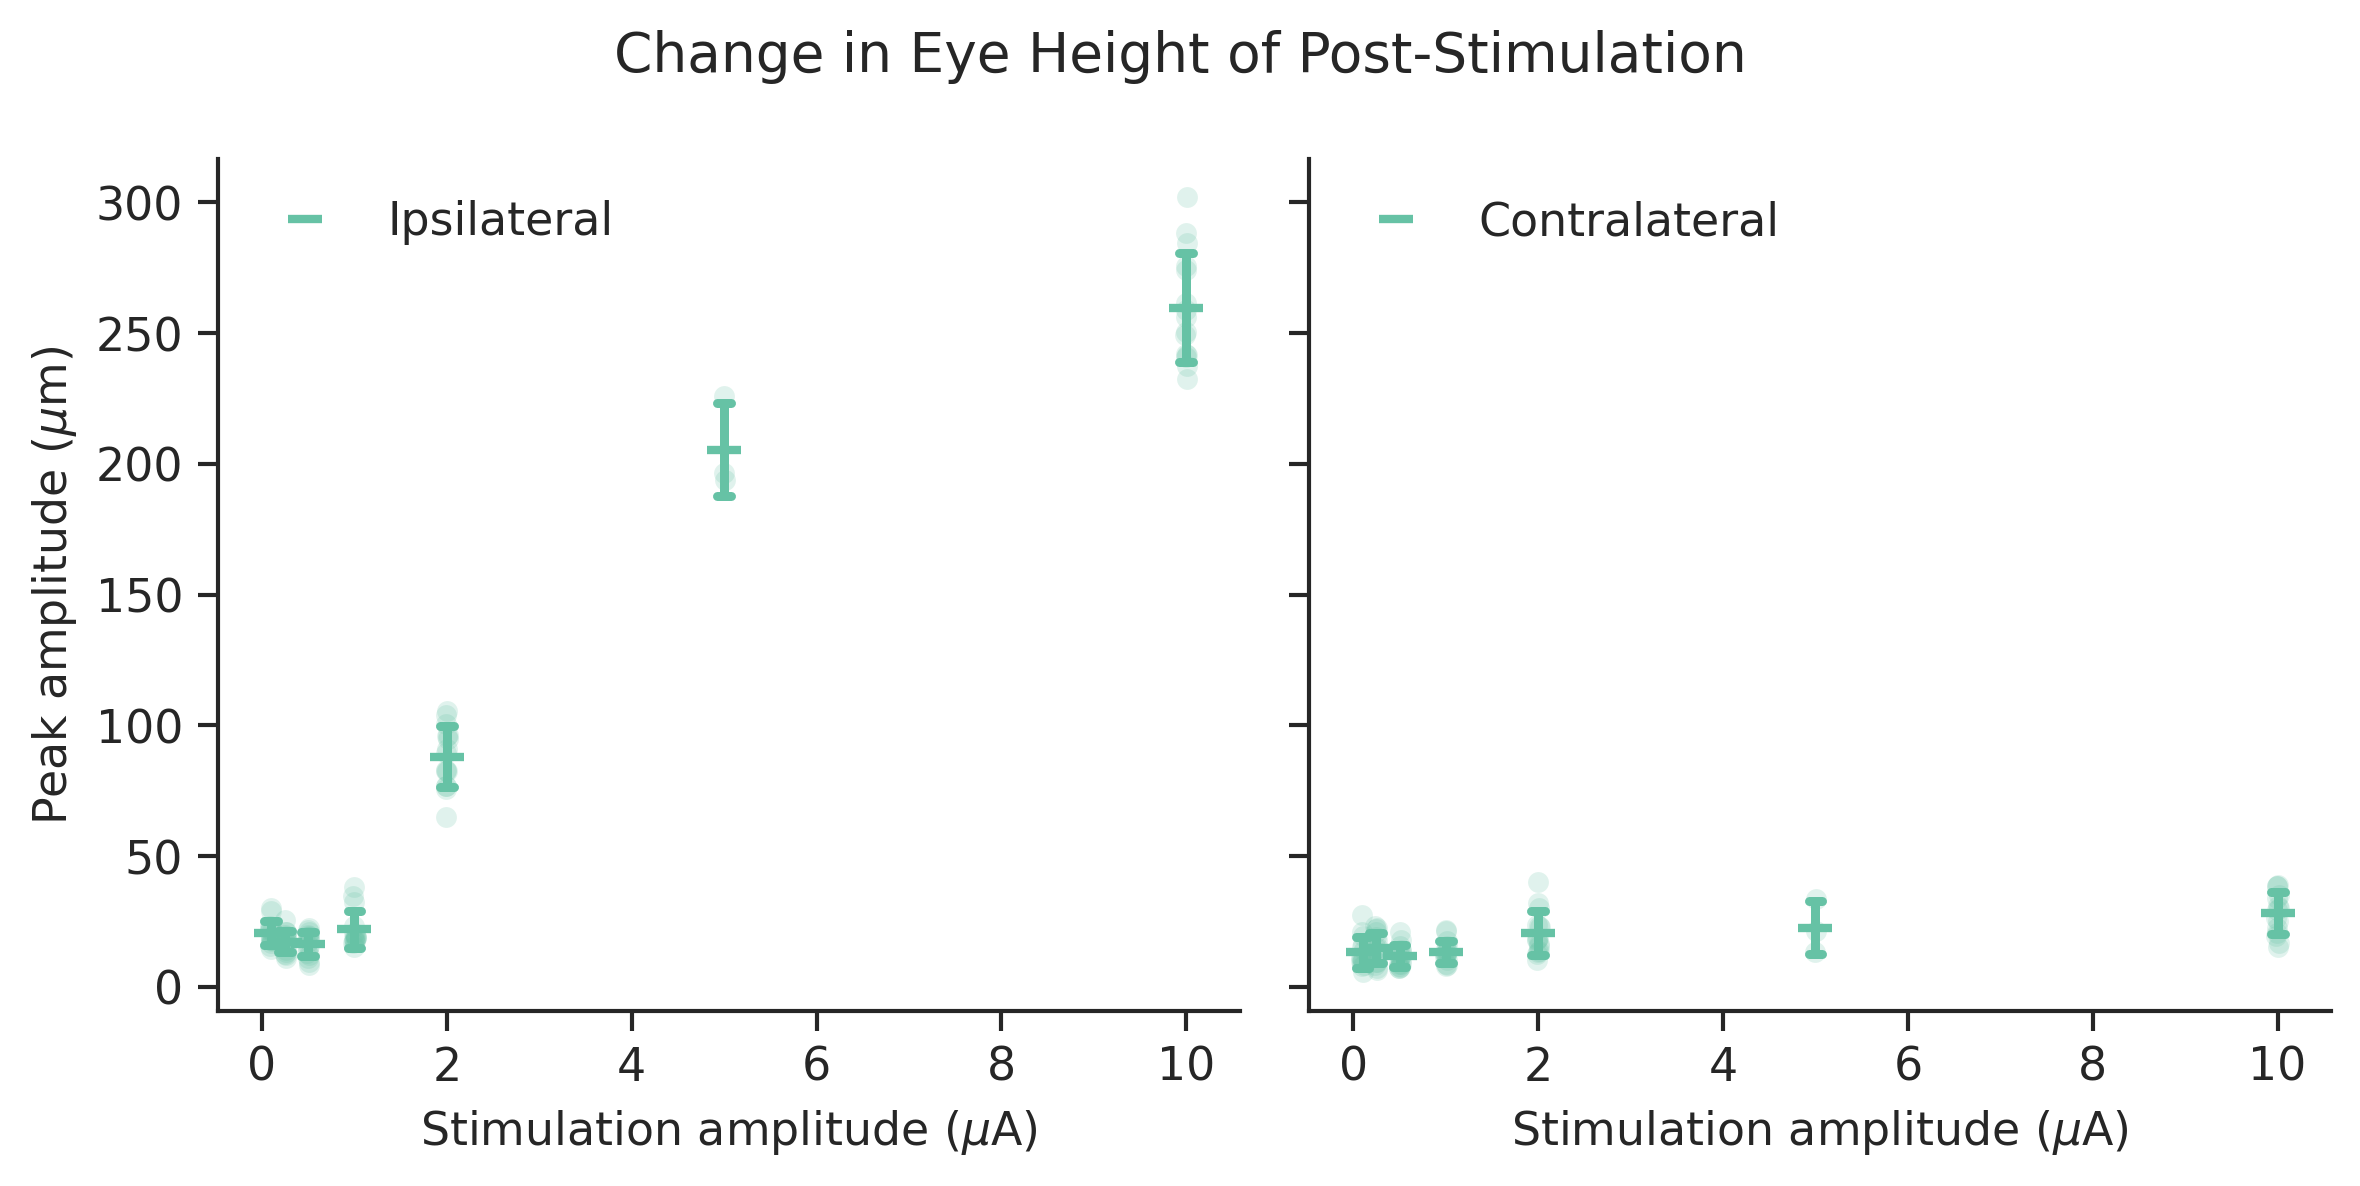

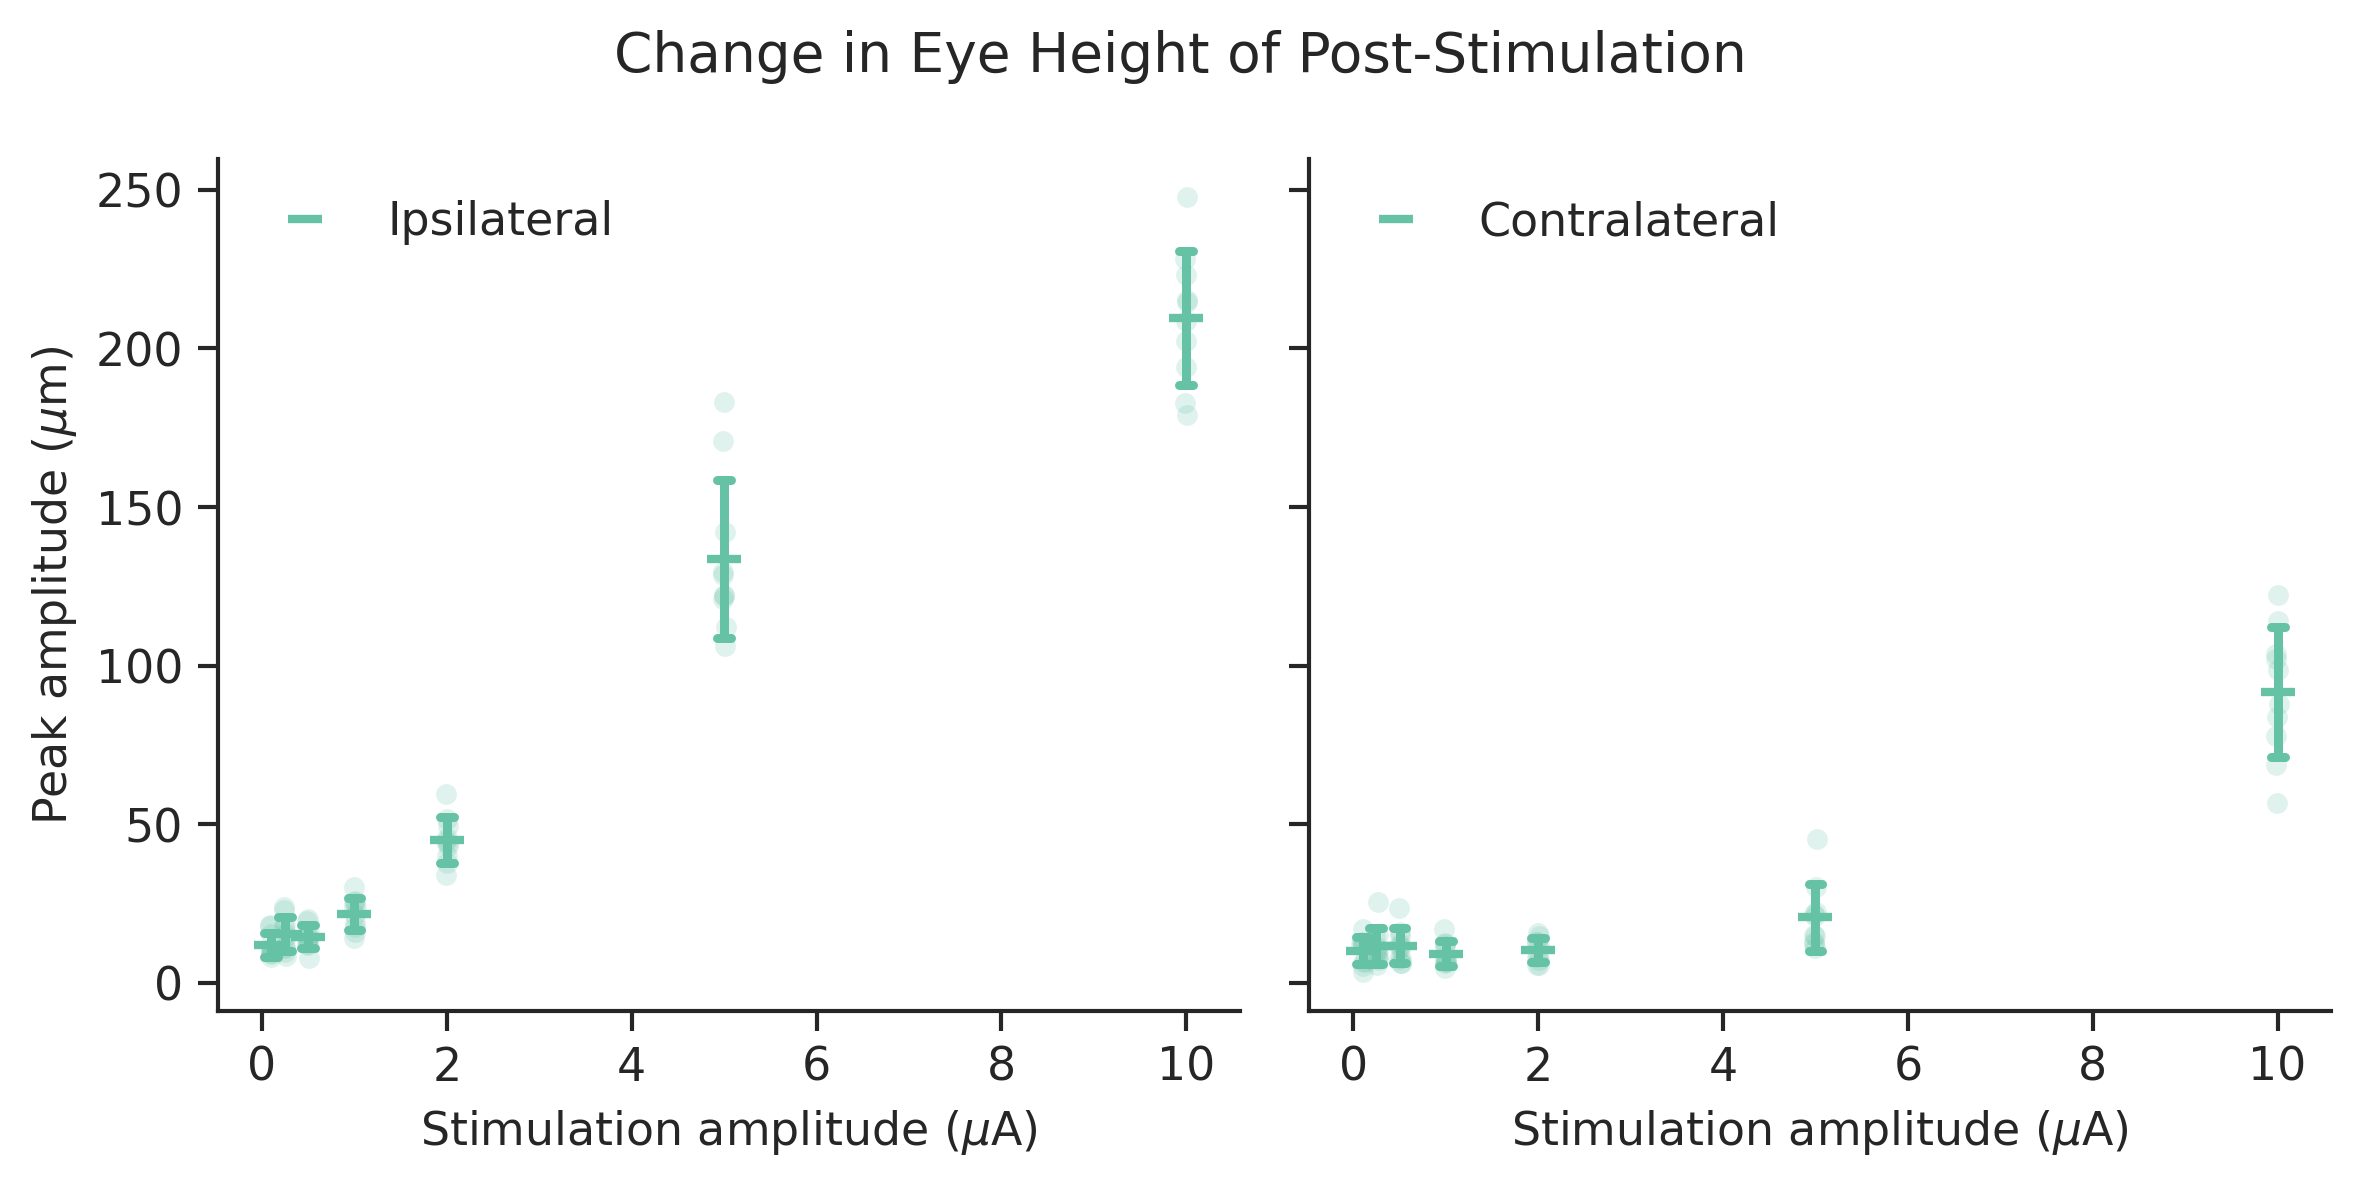

In [12]:
sessions = list(set([(date, mouse) for date, mouse, _ in data_keys]))

# we will create a separate plot for each session
for date, mouse in sessions:
    # correctly select the ipsilateral or contralateral side
    ipsi_side = CRANIOTOMY_MAP[mouse]
    contra_side = "right" if ipsi_side == "left" else "left"
    measure = f"eye-height-{ipsi_side}"
    ipsi_df = motion_df.query("date == @date & mouse == @mouse & "
                              "stim_shank == 'A' & stim_depth == 'A' & "
                              "measurement_name == @measure")
    measure = f"eye-height-{contra_side}"
    contra_df = motion_df.query("date == @date & mouse == @mouse & "
                                "stim_shank == 'A' & stim_depth == 'A' & "
                                "measurement_name == @measure")

    fig, ax = plt.subplots(ncols=2, dpi=300,
                           sharey=True, figsize=(8, 4))
    # concatenate all the rows togther into one flat x-axis and y-axis vector
    # make sure to repeat the stimulation amplitude as many times as the mouse
    # was stimulated so the x and y vectors are the same length
    ipsi_xs = np.concatenate([np.repeat(amp, len(times))
                        for amp, times in zip(ipsi_df["stim_amplitude"].values,
                                              ipsi_df["peak_amplitude"].values)], axis=0)
    ipsi_ys = np.abs(np.concatenate(ipsi_df["peak_amplitude"].values, axis=0)) * 1000
    contra_xs = np.concatenate([np.repeat(amp, len(times))
                        for amp, times in zip(contra_df["stim_amplitude"].values,
                                              contra_df["peak_amplitude"].values)], axis=0)
    contra_ys = np.abs(np.concatenate(contra_df["peak_amplitude"].values, axis=0)) * 1000

    # plot the ipsilateral data as individual points
    sns.stripplot(x=ipsi_xs, y=ipsi_ys,
                  alpha=0.2,
                  native_scale=True,
                  ax=ax[0])
    # plot the ipsilateral data as a mean and standard deviation
    sns.pointplot(x=ipsi_xs, y=ipsi_ys,
                  linestyle="none",
                  marker="_", markersize=8, markeredgewidth=2,
                  label="Ipsilateral",
                  capsize=1,
                  native_scale=True,
                  errorbar=(lambda x: (x.mean() - x.std(ddof=1), x.mean() + x.std(ddof=1))),
                  legend=False,
                  ax=ax[0])

    # plot the contralateral data as individual points
    sns.stripplot(x=contra_xs, y=contra_ys,
                  alpha=0.2,
                  native_scale=True,
                  ax=ax[1])
    # plot the contralateral data as a mean and standard deviation
    sns.pointplot(x=contra_xs, y=contra_ys,
                  linestyle="none",
                  marker="_", markersize=8, markeredgewidth=2,
                  label="Contralateral",
                  capsize=1,
                  native_scale=True,
                  errorbar=(lambda x: (x.mean() - x.std(ddof=1), x.mean() + x.std(ddof=1))),
                  legend=False,
                  ax=ax[1])

    sns.despine(fig)
    ax[0].legend(frameon=False, loc="upper left")
    ax[1].legend(frameon=False, loc="upper left")
    ax[0].set_xlabel("Stimulation amplitude ($\mu$A)")
    ax[1].set_xlabel("Stimulation amplitude ($\mu$A)")
    ax[0].set_ylabel("Peak amplitude ($\mu$m)")
    fig.suptitle("Change in Eye Height of Post-Stimulation")
    fig.tight_layout()

We see that the ipsilateral side changes correlate with the stimulation amplitude,
while the contralateral side does not until the stimulation amplitude is much higher.

So far, we've only focused on data with all electrodes.
Now, let's look at location dependent stimulation.
In the cells below, we will generate heatmaps (one for each facial feature and
recording date+mouse). The x- and y-axis of heatmaps correspond to the stimulation
location, and the color is the average peak amplitude of the given facial feature
at a specific stimulation current and location.

As you will see, certain facial features respond to certain stimulation locations.
To get a sense of how they respond, we will compute a "center of gravity"---
which is a point in the 2D stimulation space that identifies which location a
facial feature responds to most.

For now, the `compute_center_of_gravity` function simply returns the average
of all the stimulation locations. So, the "center of gravity" is dead center in
the 2D space. **_Your job is to incorporate the `response` argument to compute
the true center of gravity_**. Hint: it should be weighted by the respond in each
location.

In [13]:
# TODO: rewrite the body of this function to compute the true center of gravity
# then re-run both cells
def compute_center_of_gravity(response, locations):
    weights = np.expand_dims(response, axis=-1)
    weights = weights / np.sum(weights)
    weighted_locs = weights * locations

    return np.sum(weighted_locs, axis=(0, 1))

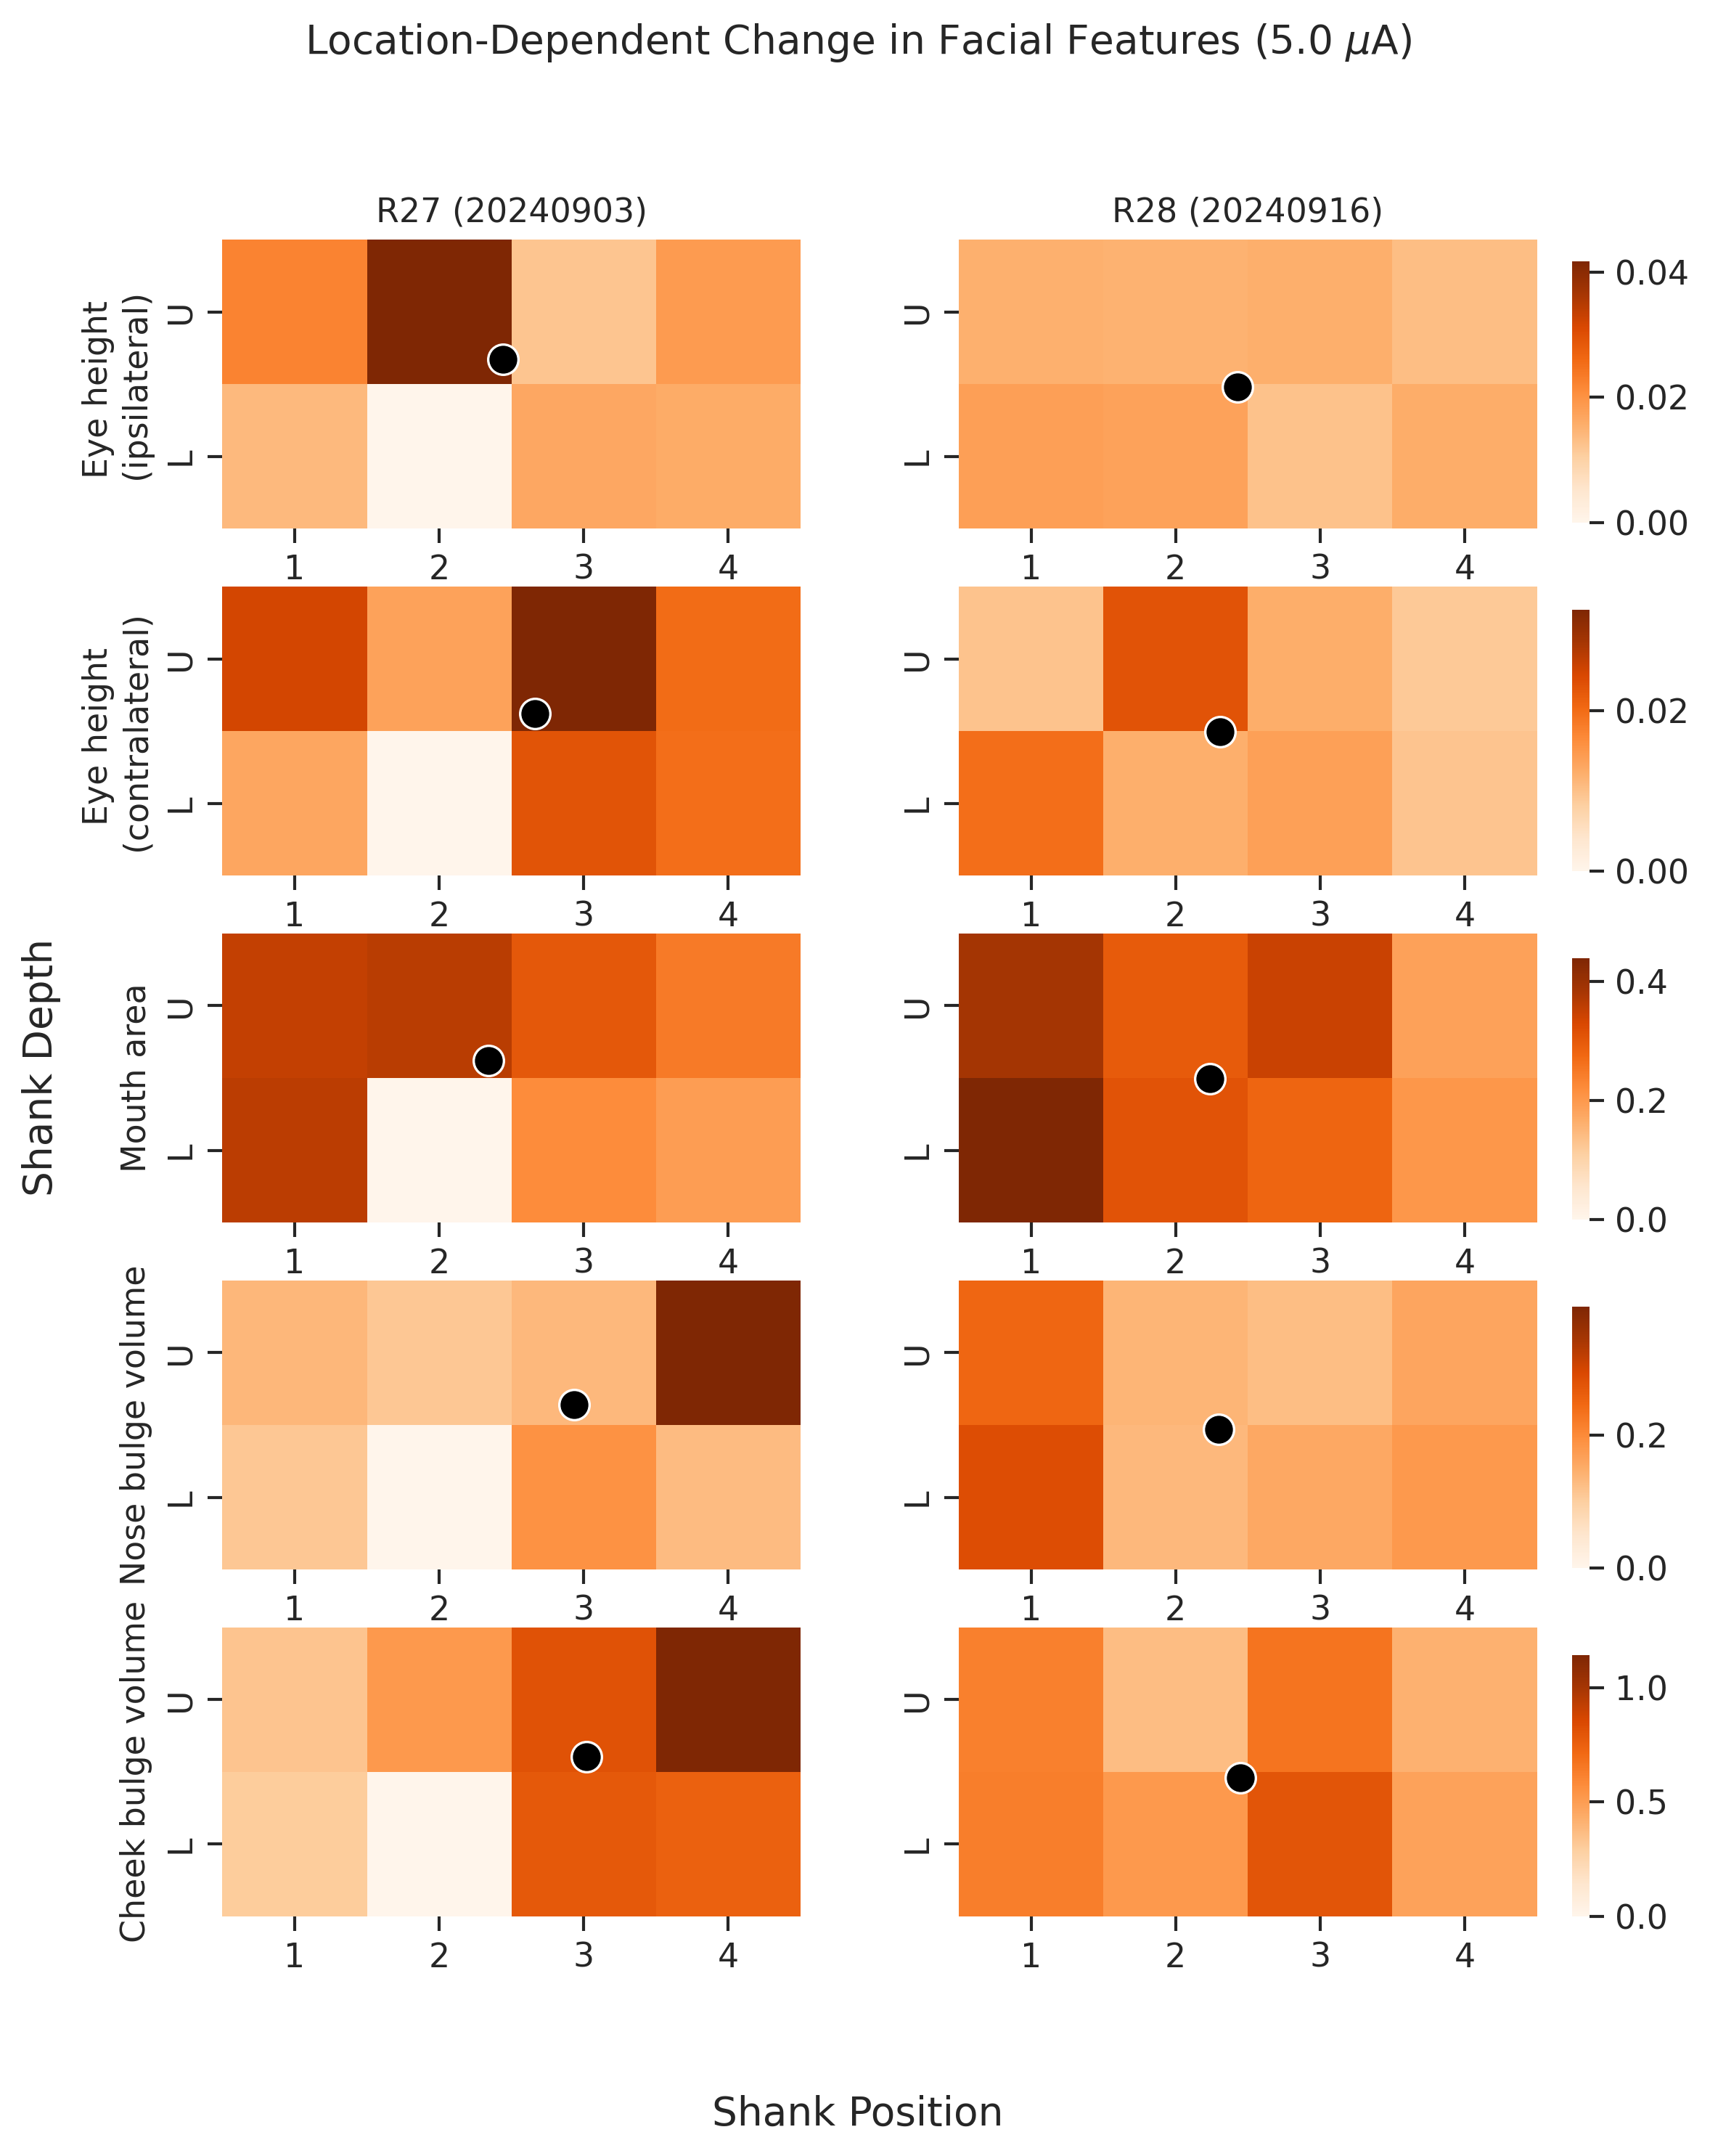

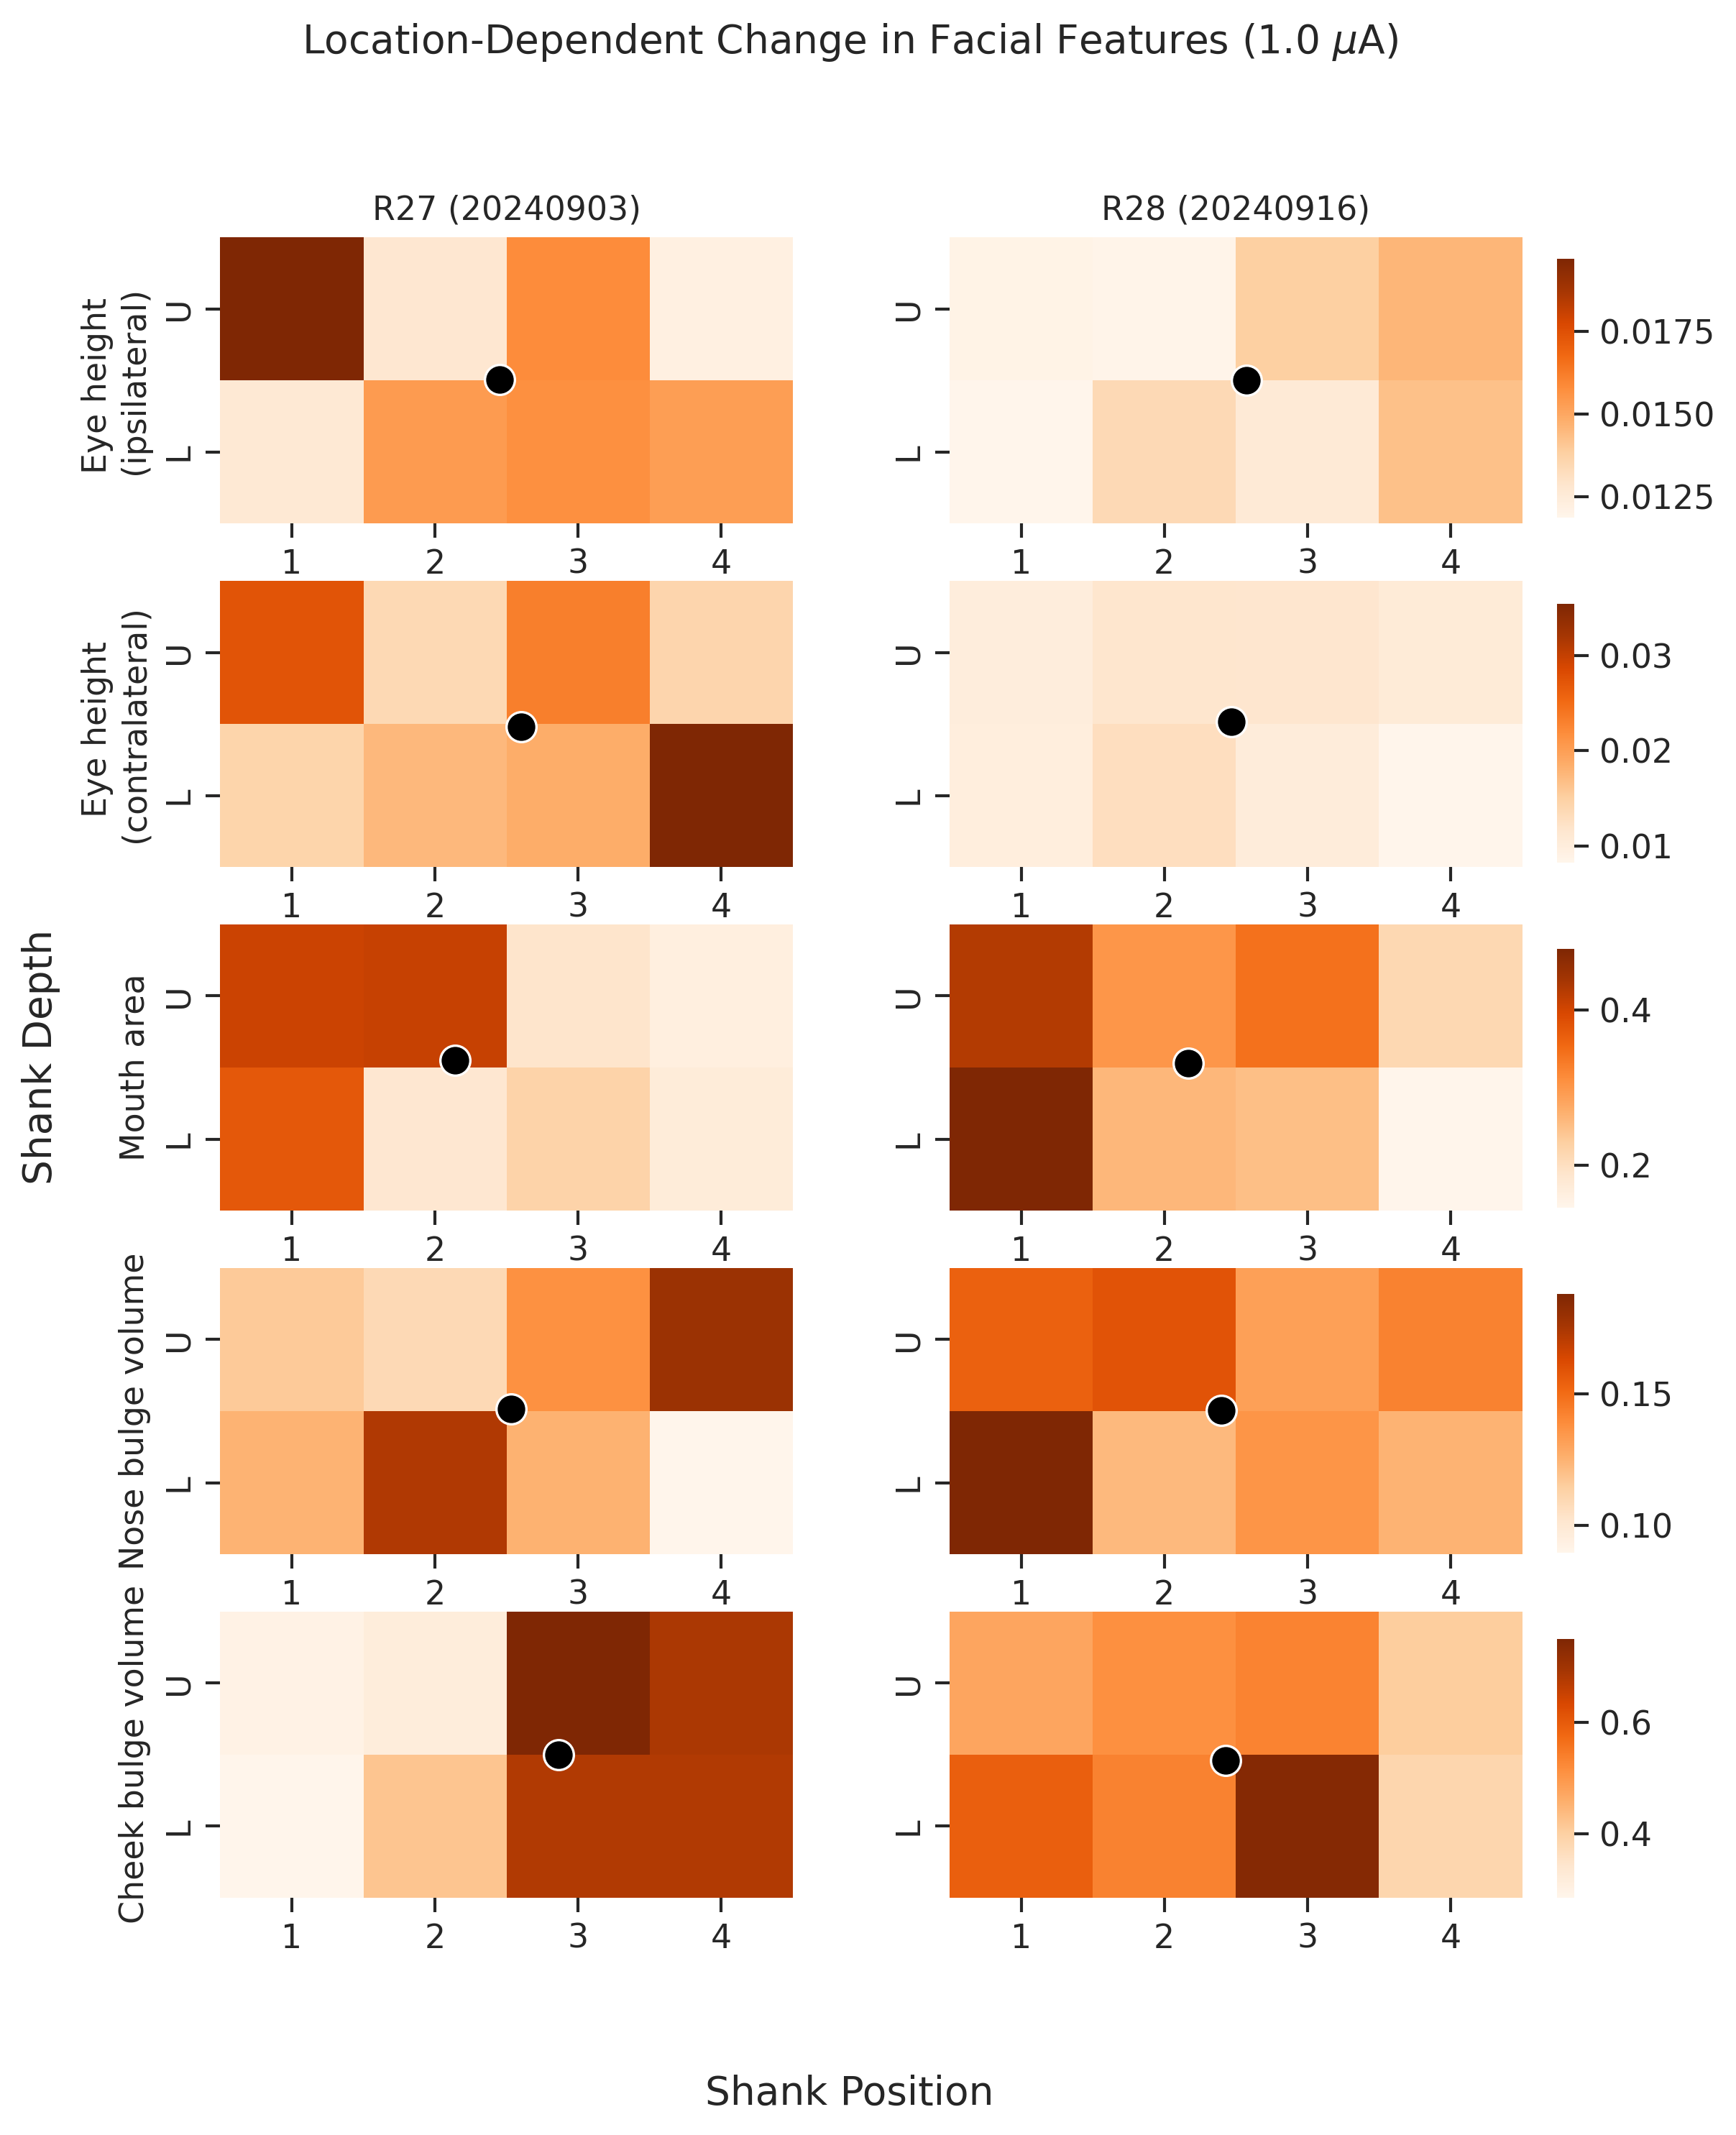

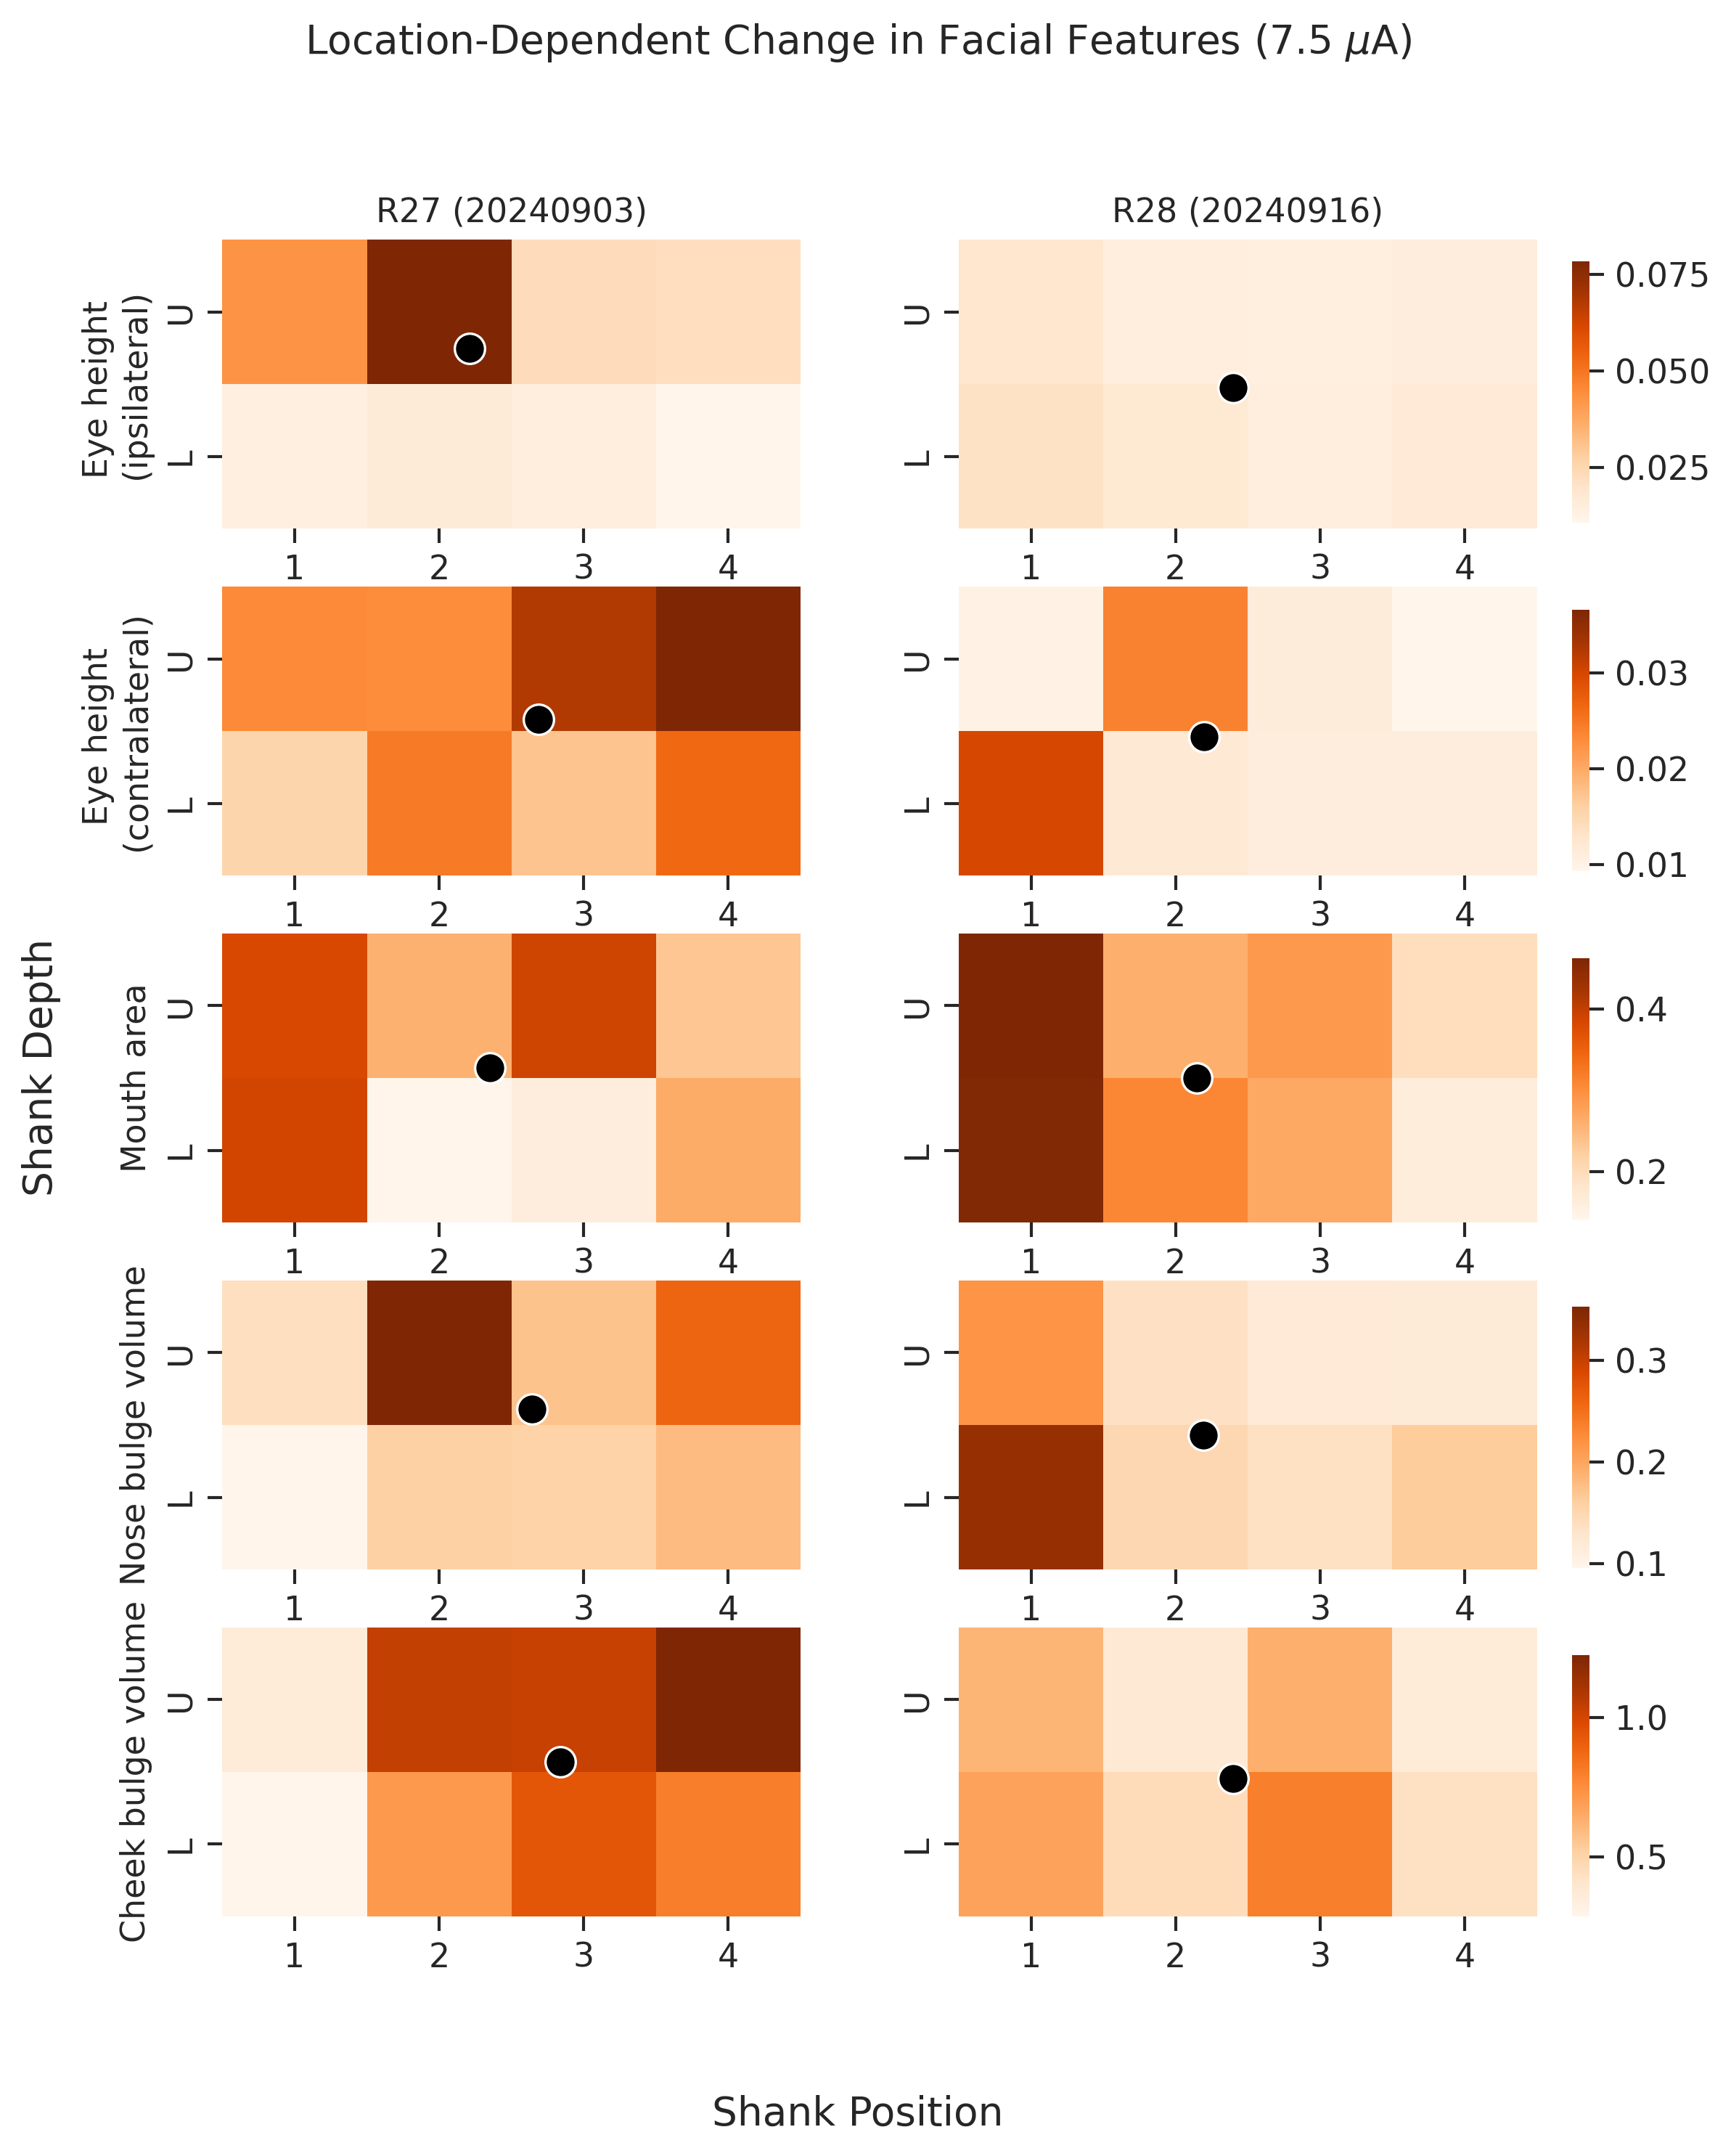

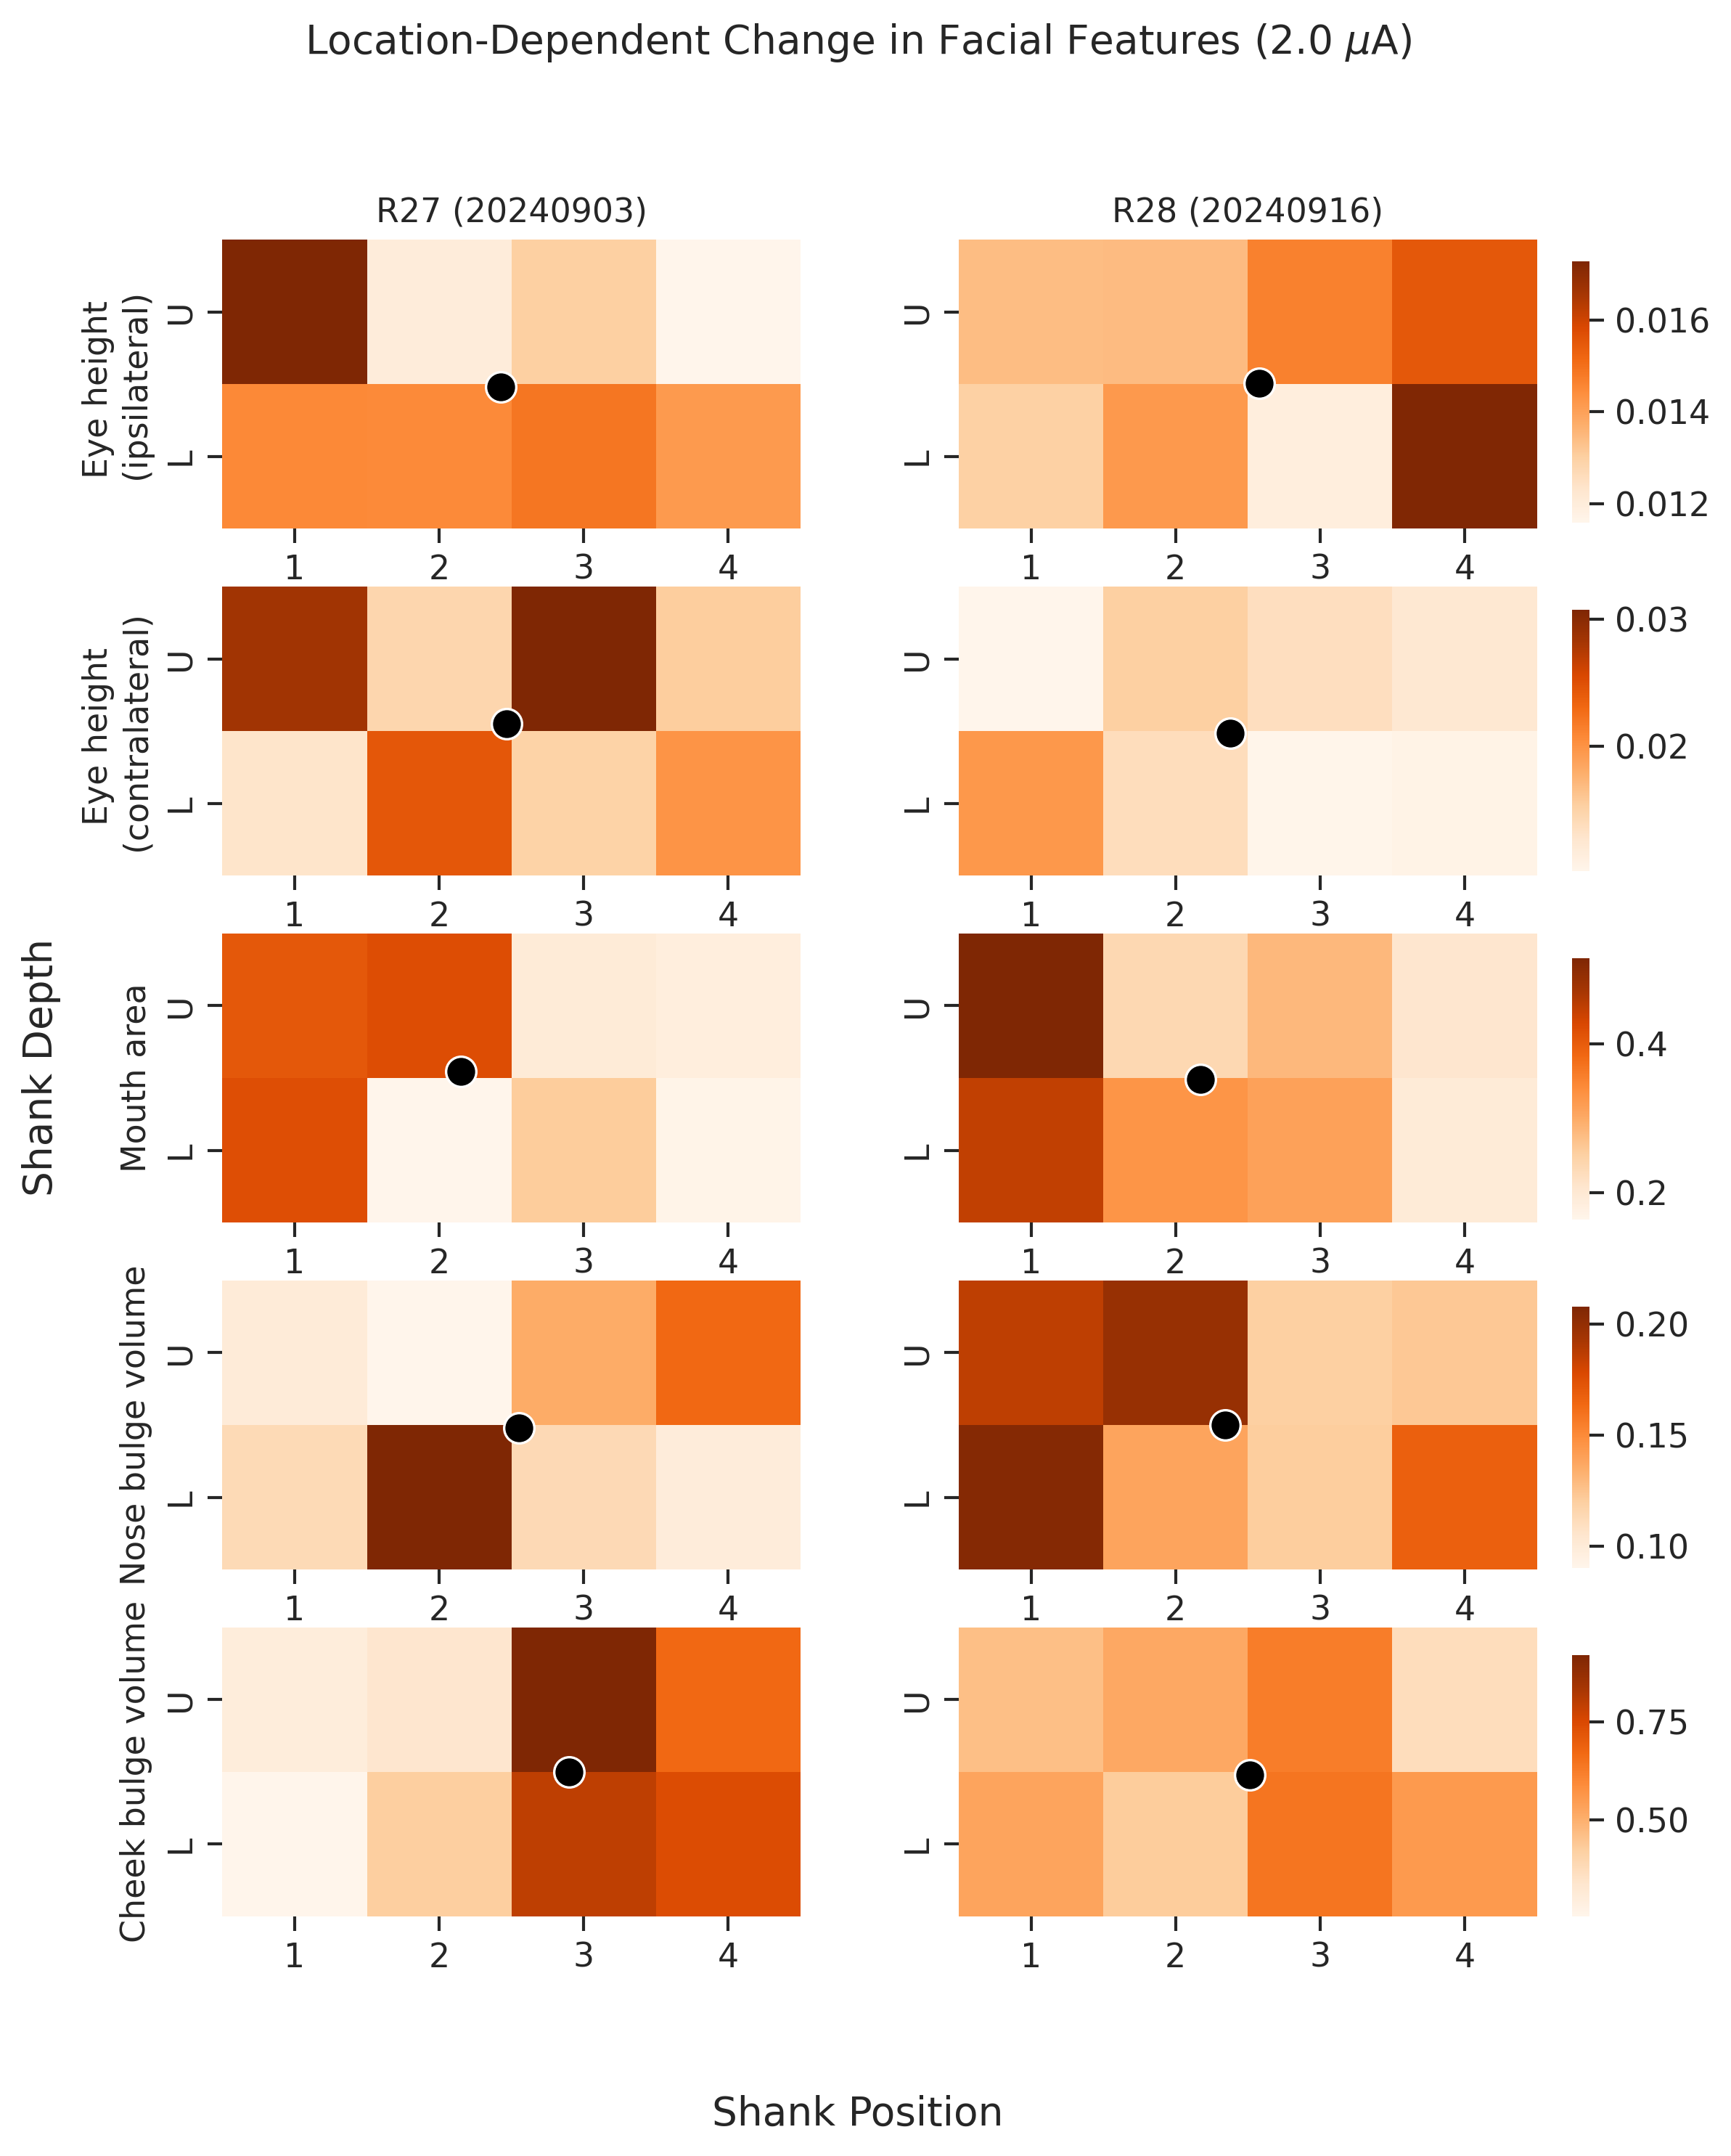

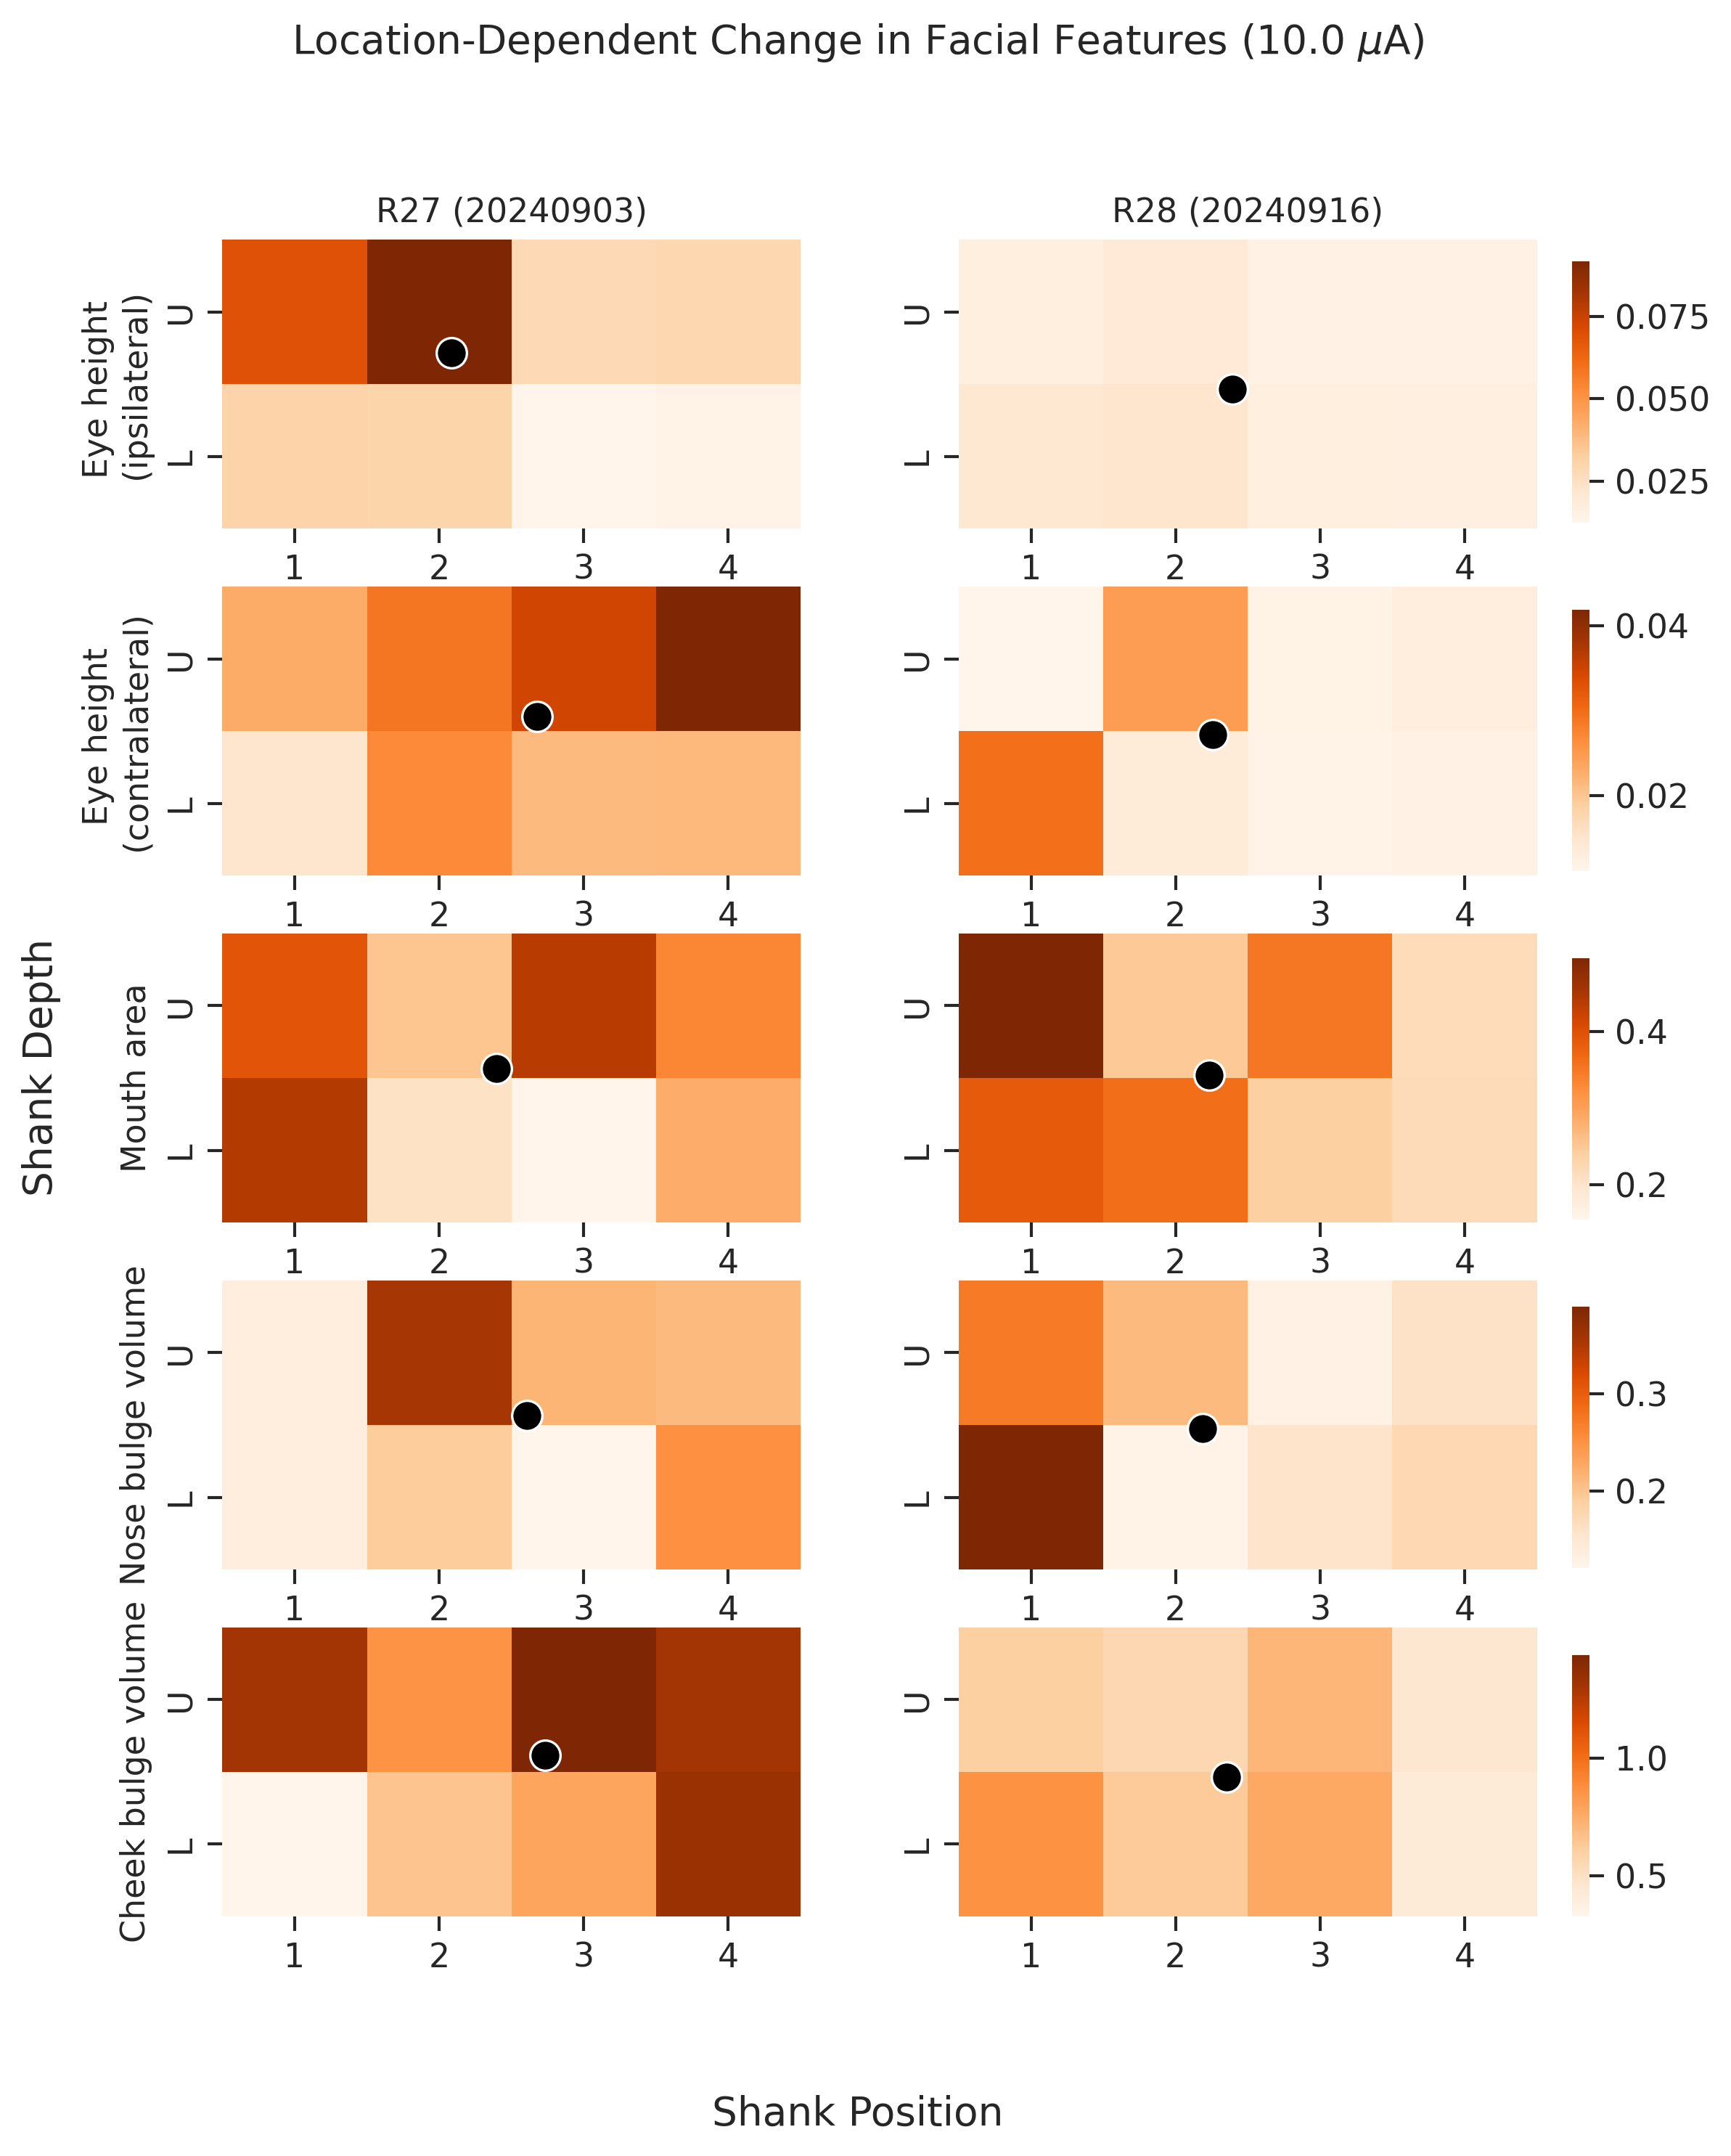

In [15]:
# define an equally spaced grid of stimulation locations
locations = np.array([[[i, j] for j in range(4)] for i in range(2)])
locations = locations + np.array([[[0.5, 0.5]]])
# choose a subset of measurements, dates/mice, and amplitudes for plotting
measurements = ["eye-height-ipsi",
                "eye-height-contra",
                "mouth-area",
                "nose-bulge-volume",
                "cheek-bulge-volume"]
sessions = list(set([(date, mouse) for date, mouse, _ in data_keys]))
amplitudes = motion_df.query("stim_shank != 'A' & stim_depth != 'A'").stim_amplitude.unique()

# in the loop below, we go to each amplitude, then date and mouse, then measurement
# and we extract the average peak amplitude for different stimulation locations
data = {amp: {session: {measure: np.zeros((2, 4)) for measure in measurements}
              for session in sessions}
        for amp in amplitudes}
centers = {amp: {session: {measure: np.zeros((2,)) for measure in measurements}
                 for session in sessions}
           for amp in amplitudes}
for amp in amplitudes:
    for session in sessions:
        date, mouse = session
        for measure in measurements:
            # loop over the stimulation depth and shank
            for row, depth in enumerate(("U", "L")):
                for col, shank in enumerate(("1", "2", "3", "4")):
                    # select the ipsi/contra side of the facial feature
                    # only if it is not a bilateral facial feature
                    ipsi_side = CRANIOTOMY_MAP[mouse]
                    contra_side = "right" if ipsi_side == "left" else "left"
                    _measure = (measure.replace("ipsi", ipsi_side)
                                       .replace("contra", contra_side))
                    # get the peak amplitude responses
                    response = motion_df.query(
                        "date == @date & mouse == @mouse & "
                        "measurement_name == @_measure & "
                        "stim_amplitude == @amp & "
                        "stim_shank == @shank & stim_depth == @depth"
                    )
                    # if the specific amplitude, session, measure was not
                    # recorded in this experiment, then skip
                    if len(response) == 0:
                        continue
                    # compute the average absolute peak amplitude and add it to
                    # the data dictionary
                    peak = np.concatenate(response.peak_amplitude.values, axis=0)
                    data[amp][session][measure][row, col] = np.mean(np.abs(peak))
            # once we have the average peak amplitude for all locations
            # compute the center of gravity
            centers[amp][session][measure] = compute_center_of_gravity(
                data[amp][session][measure], locations
            )

# create a separate set of plots for each amplitude
for amp in amplitudes:
    fig, axs = plt.subplots(nrows=len(measurements),
                            ncols=len(sessions),
                            dpi=300,
                            figsize=(4 * len(sessions), 2 * len(measurements)))
    cbar_axs = []
    for i in range(len(measurements)):
        cbar_axs.append(fig.add_axes([0.91, 0.75 - i * 0.16, .01, 0.12]))

    for i, measure in enumerate(measurements):
        data_min = min(np.min(data[amp][session][measure])
                       for session in sessions)
        data_max = max(np.max(data[amp][session][measure])
                       for session in sessions)
        for j, (date, mouse) in enumerate(sessions):
            sns.heatmap(data=data[amp][(date, mouse)][measure],
                        xticklabels=("1", "2", "3", "4"),
                        yticklabels=("U", "L"),
                        cbar_ax=cbar_axs[i],
                        square=True,
                        # center=0,
                        cmap=sns.color_palette("Oranges", as_cmap=True),
                        vmin=data_min,
                        vmax=data_max,
                        ax=axs[i, j])
            sns.scatterplot(x=[centers[amp][(date, mouse)][measure][1]],
                            y=[centers[amp][(date, mouse)][measure][0]],
                            s=100,
                            color="black",
                            legend=False,
                            ax=axs[i, j])
            if i == 0:
                axs[i, j].set_title(f"{mouse} ({date})")
        axs[i, 0].set_ylabel(measure.replace("-", " ")
                                    .capitalize()
                                    .replace("ipsi", "\n(ipsilateral)")
                                    .replace("contra", "\n(contralateral)"))
    fig.supxlabel("Shank Position")
    fig.supylabel("Shank Depth")
    fig.suptitle(f"Location-Dependent Change in Facial Features ({amp} $\mu$A)")

We can also plot the centers alone without the heatmap across stimulation amplitudes.

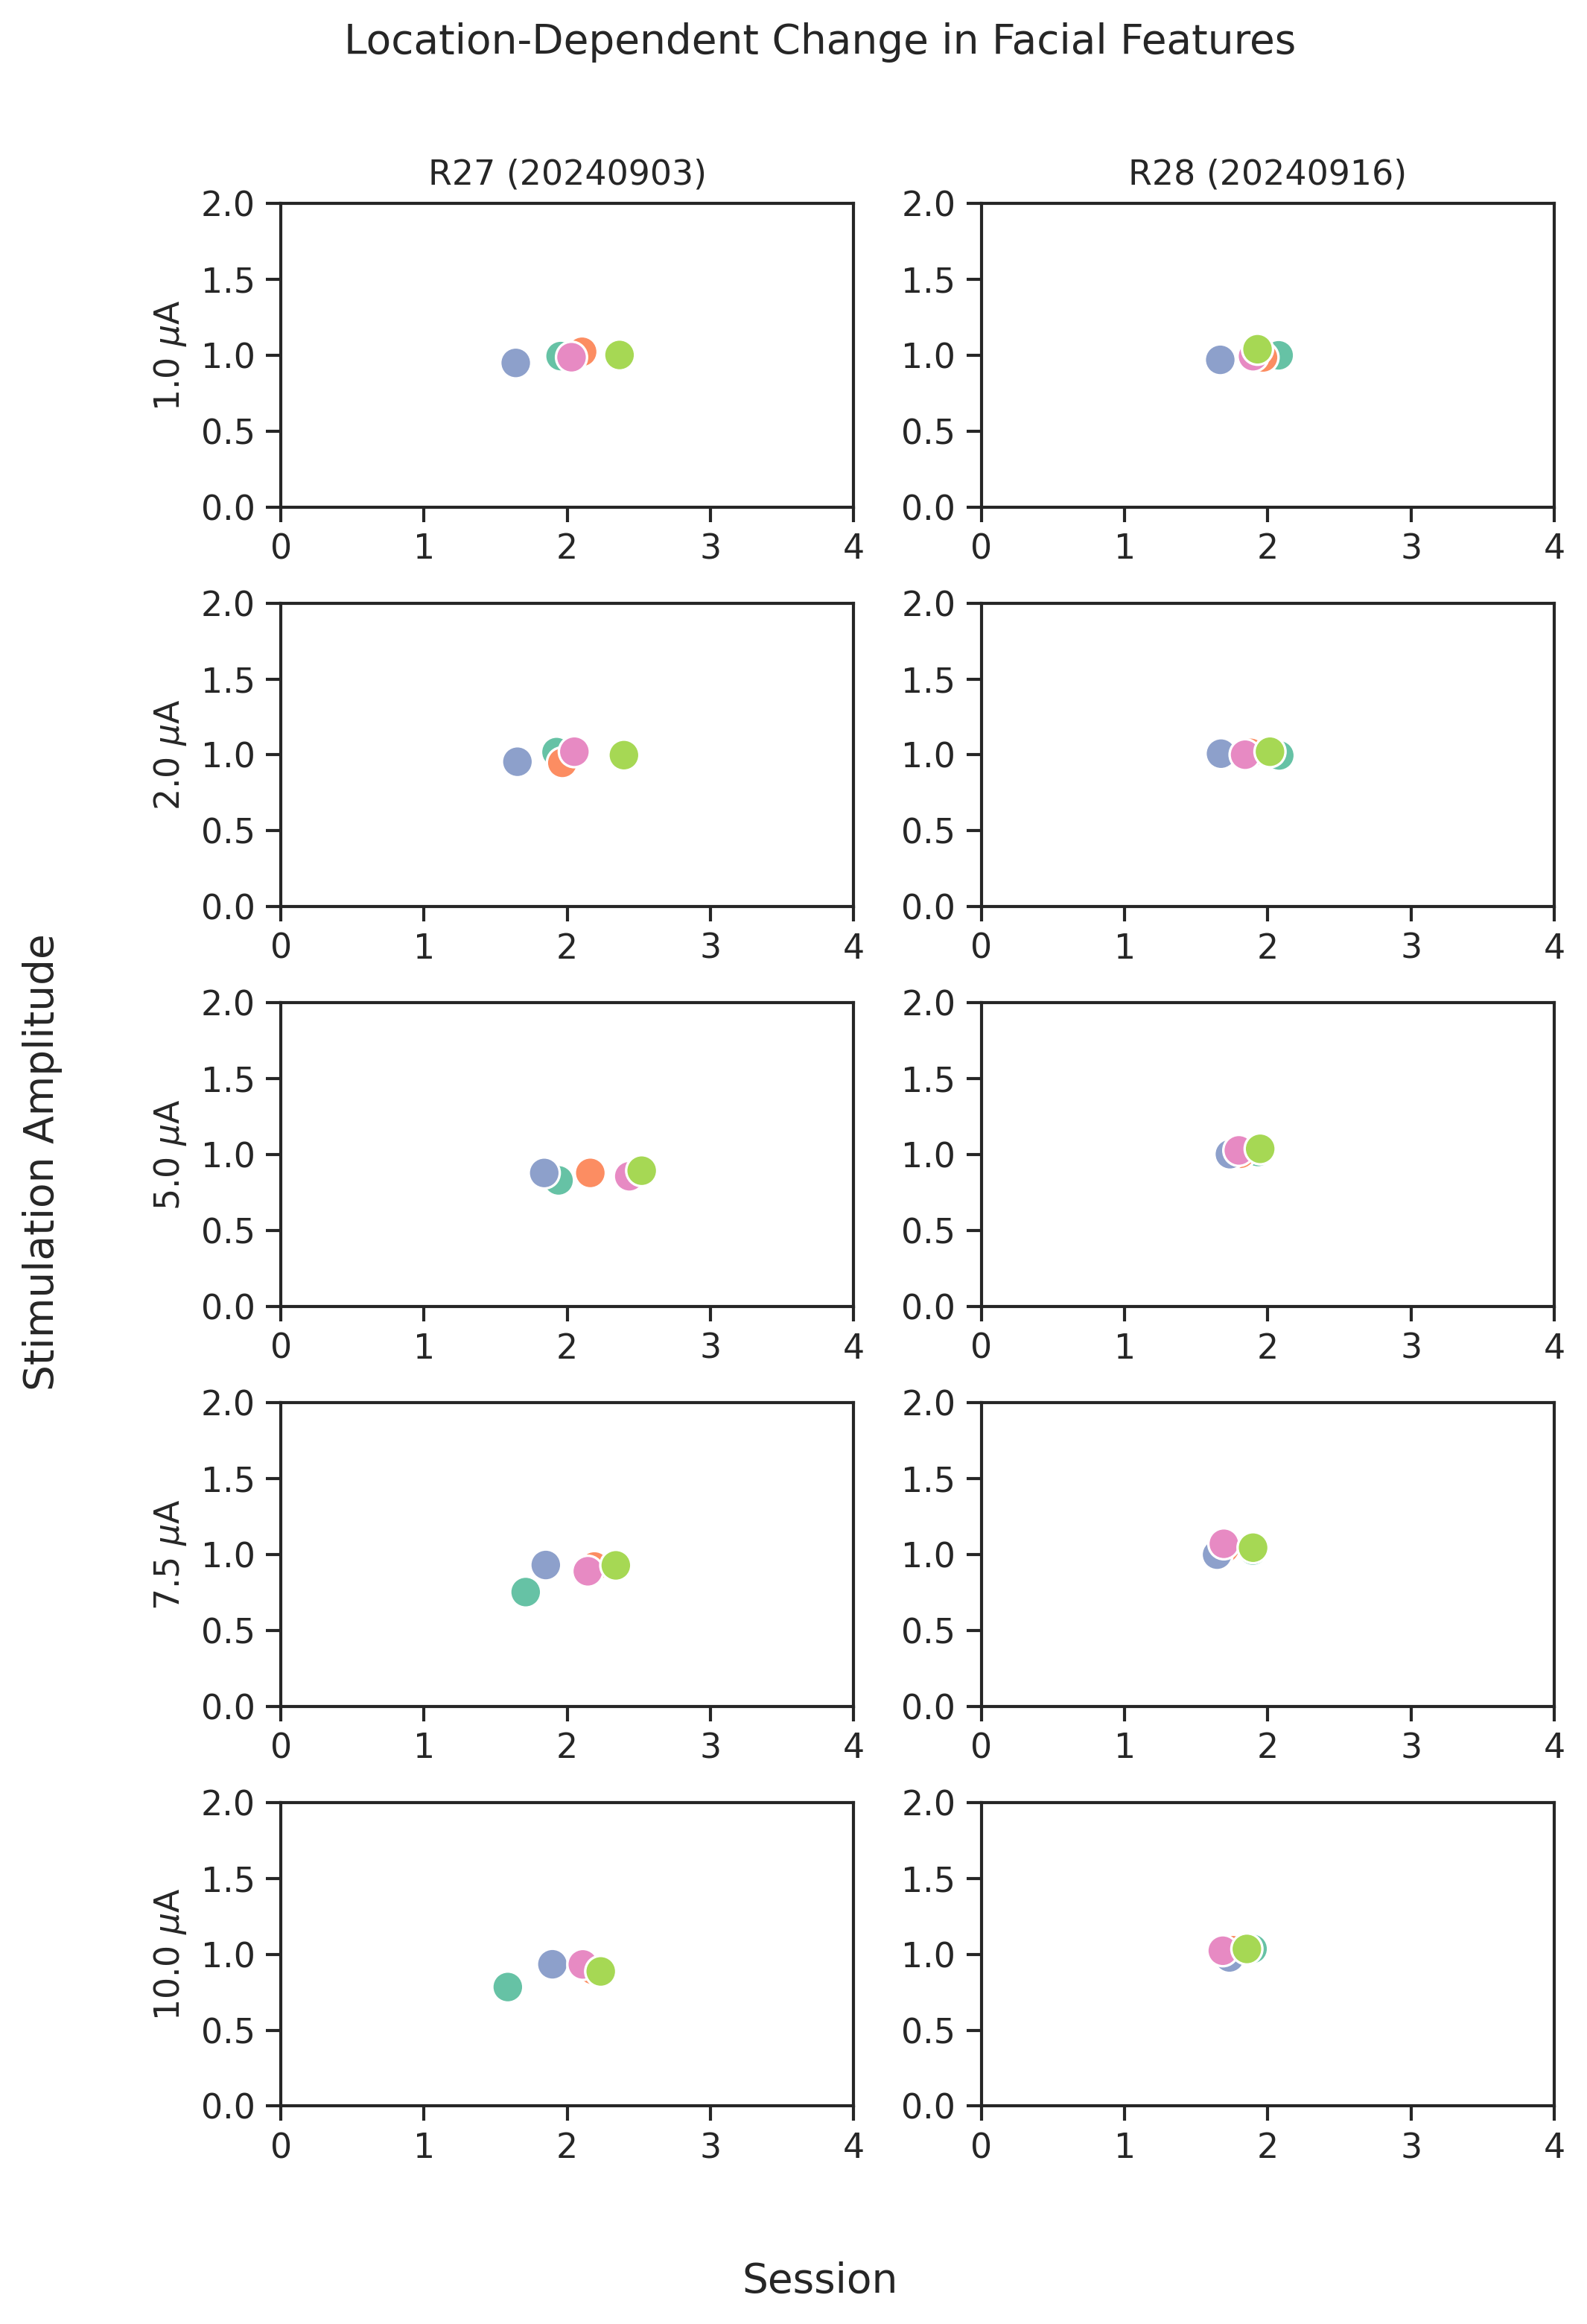

In [16]:
fig, axs = plt.subplots(nrows=len(amplitudes),
                        ncols=len(sessions),
                        dpi=300,
                        figsize=(3.5 * len(sessions), 2 * len(amplitudes)))

for i, amp in enumerate(np.sort(amplitudes)):
    for j, (date, mouse) in enumerate(sessions):
        xs = np.array([centers[amp][(date, mouse)][measure][1]
                       for measure in measurements])
        ys = np.array([centers[amp][(date, mouse)][measure][0]
                       for measure in measurements])
        sns.scatterplot(x=xs, y=ys, hue=measurements,
                        s=100,
                        legend=False,
                        ax=axs[i, j])
        axs[i, j].set_xlim(0, 4)
        axs[i, j].set_ylim(0, 2)
        if i == 0:
            axs[i, j].set_title(f"{mouse} ({date})")
        if j == 0:
            axs[i, j].set_ylabel(f"{amp} $\mu$A")
fig.supxlabel("Session", y=-0.01)
fig.supylabel("Stimulation Amplitude", x=-0.01)
fig.suptitle("Location-Dependent Change in Facial Features", y=1.01)
fig.tight_layout(h_pad=0.7)